<a href="https://colab.research.google.com/github/koheikobayashi/machine-learning/blob/main/%E5%8A%B9%E6%9E%9C%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B テスト

A/Bテストとは、2つのバージョン(AとB)を比較してどちらがより効果的であるかを判定するための実験手法です。主にマーケティングやウェブサイトのデザイン変更に伴う効果測定に使用されます。理論的には仮説検定の手法を用いて、2つのサンプルの平均値が統計的に有意な差を持つかを分析します。例えば、帰無仮説を"バージョンAとBに効果の差はない"と設定し、有意水準(通常は5%)で検定します。数式としては、平均値の差が標準誤差の範囲内かを確認するために$t$検定などが用いられます。数式はインラインでは$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$となり、ブロック数式では$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$です。ここで$s_p$はプールされた標準偏差、$\bar{x}_1$と$\bar{x}_2$はそれぞれのサンプルの平均、$n_1$と$n_2$はサンプルサイズです。

In [1]:
# 必要なライブラリをインポート
import numpy as np
from scipy import stats

# サンプルデータを準備
np.random.seed(0)
# グループAのデータ（例: コンバージョン率）
data_A = np.random.normal(loc=0.5, scale=0.1, size=100)
# グループBのデータ（例: コンバージョン率）
data_B = np.random.normal(loc=0.55, scale=0.1, size=100)

# グループAの平均
mean_A = np.mean(data_A)
print('Mean of Group A:', mean_A)

# グループBの平均
mean_B = np.mean(data_B)
print('Mean of Group B:', mean_B)

# プールされた標準偏差の計算
def pooled_std(data1, data2):
    n1, n2 = len(data1), len(data2)
    std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    return np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

s_p = pooled_std(data_A, data_B)
print('Pooled Standard Deviation:', s_p)

# t-statisticの計算
t_stat = (mean_A - mean_B) / (s_p * np.sqrt(1/len(data_A) + 1/len(data_B)))
print('t-statistic:', t_stat)

# P値の計算
p_value = stats.t.cdf(t_stat, df=2*(len(data_A)-1)) * 2
print('P-value:', p_value)

# P値が0.05未満であれば帰無仮説を棄却
if p_value < 0.05:
    print('結果: 有意な差があります。')
else:
    print('結果: 有意な差はありません。')

Mean of Group A: 0.5059808015534486
Mean of Group B: 0.5582012970747837
Pooled Standard Deviation: 0.10265078622761412
t-statistic: -3.5971927597496047
P-value: 0.00040627960203626394
結果: 有意な差があります。


# 差分の差法（DID）

差分の差法（Difference-in-Differences, DID）は、政策などの介入が与える効果を検証するための統計的手法です。この手法は、介入前後の処置群と対照群の結果の差を用いて、その差の差（つまり、二つの差分の差）を計算することで、介入効果を推定します。

数式としては、次のように表現されます。インラインでは $DID = (Y_{T,after} - Y_{T,before}) - (Y_{C,after} - Y_{C,before})$ です。

ブロック数式として:
$$
DID = (Y_{T,after} - Y_{T,before}) - (Y_{C,after} - Y_{C,before})
$$
ここで、$Y_{T,after}$ は介入後の処置群の平均、$Y_{T,before}$ は介入前の処置群の平均、$Y_{C,after}$ は介入後の対照群の平均、$Y_{C,before}$ は介入前の対照群の平均です。

DIDの主な用途は、自然実験のような設定で、処置がランダムに割り当てられるのが難しい状況における処置効果の推定です。「Pythonで学ぶ効果検証入門」では、この方法を用いてデータの分析と介入効果の推定を行い、効果検証の実践的な手法を学ぶことができます。

In [2]:
# 差分の差法 (DID) を実装するためのPythonコードです。仮想データを使用して、介入の効果をシミュレートします。

import numpy as np
import pandas as pd

# 仮想データを生成する
np.random.seed(0)

# サンプル数
n_samples = 100

# 処置群の介入前と介入後のデータを生成
Y_T_before = np.random.normal(loc=5.0, scale=1.0, size=n_samples)
Y_T_after = np.random.normal(loc=7.0, scale=1.0, size=n_samples)  # 介入による効果あり

# 対照群の介入前と介入後のデータを生成
Y_C_before = np.random.normal(loc=5.0, scale=1.0, size=n_samples)
Y_C_after = np.random.normal(loc=5.2, scale=1.0, size=n_samples)  # 介入効果なし

# 各グループの平均値を計算
mean_Y_T_before = np.mean(Y_T_before)
mean_Y_T_after = np.mean(Y_T_after)
mean_Y_C_before = np.mean(Y_C_before)
mean_Y_C_after = np.mean(Y_C_after)

print('処置群 介入前の平均:', mean_Y_T_before)
print('処置群 介入後の平均:', mean_Y_T_after)
print('対照群 介入前の平均:', mean_Y_C_before)
print('対照群 介入後の平均:', mean_Y_C_after)

# DIDを計算
DID = (mean_Y_T_after - mean_Y_T_before) - (mean_Y_C_after - mean_Y_C_before)

print('DIDによる介入効果の推定:', DID)

# このコードでは、処置群と対照群のそれぞれの介入前後のデータの平均を計算し、その差をとることでDIDを求めます。
# 仮想的な介入の効果は、処置群の介入後の平均が介入前から増加していることから推測されます。


処置群 介入前の平均: 5.059808015534485
処置群 介入後の平均: 7.082012970747838
対照群 介入前の平均: 4.940767739440337
対照群 介入後の平均: 5.0032032934540895
DIDによる介入効果の推定: 1.9597694011996003


# 回帰不連続デザイン（RDD）

回帰不連続デザイン（Regression Discontinuity Design, RDD）は、観察データから因果関係を推測するための手法の一つです。特定のカットオフポイントを中心に対処群と対照群のアウトカムを比較することで、介入の効果を推定します。このカットオフポイントによって得られるもので典型的な例が試験の合否や政府補助の支給資格などがあります。

例えば、テストのスコアが60点以上で合格となるとき、59点の人と61点の人のいわゆる「人為的な」違いは小さい（ほぼ無視できる）ですが、この条件によって処置有無が明確に分かれます。このような状況で、処置の因果効果を推定するのがRDDです。

理論的には$x_i$を独立変数（変数）がカットオフ点$c$を基にした変数$x_i - c$の関数として説明し、$y_i$が従属変数（アウトカム）であり、断続性がない場合、$E[y_i|x_i]$は$x_i$の滑らかな関数と仮定します。

**数式インライン**: $E[y_i|x_i] = lpha + eta \cdot (x_i - c) + \epsilon_i$。

**ブロック数式**:
$$
E[y_i|x_i] = egin{cases} lpha + eta \cdot (x_i - c) + \epsilon_i, & \text{if } x_i \geq c \\ lpha + \gamma \cdot (x_i - c) + \epsilon_i, & \text{if } x_i < c \end{cases}
$$

RDDはPythonで学ぶ効果検証入門の中で、データサイエンス分野における因果推論の手法の一つとして紹介され、データ分析における実証的因果関係の推定に使用されることがあります。

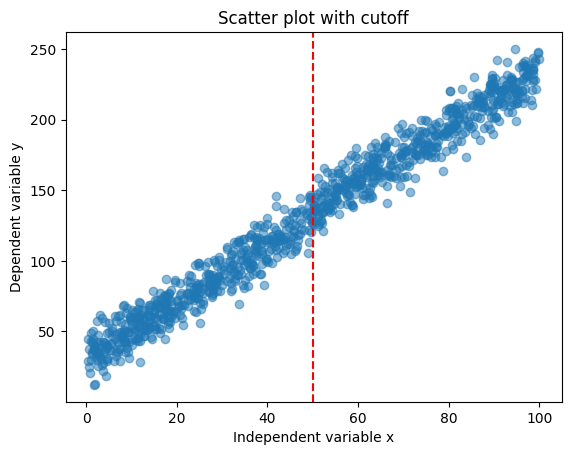

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:49:58   Log-Likelihood:                -3706.9
No. Observations:                1000   AIC:                             7422.
Df Residuals:                     996   BIC:                             7441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         130.8876      0.923    141.840      

In [3]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# サンプルデータの作成
data_size = 1000
np.random.seed(42)

# 独立変数x
x = np.random.uniform(0, 100, data_size)

# カットオフポイント
cutoff = 50

# 処置効果（cutoffより大きい場合に効果があると仮定）
treatment_effect = 5

# ノイズの生成
epsilon = np.random.normal(0, 10, data_size)

# 従属変数yの生成
y = 30 + 2 * x + epsilon

# カットオフを基にした処置効果の追加
y[x >= cutoff] += treatment_effect

# DataFrameの作成
df = pd.DataFrame({'x': x, 'y': y})

# 散布図の描画
plt.scatter(df['x'], df['y'], alpha=0.5)
plt.axvline(cutoff, color='red', linestyle='--')
plt.title('Scatter plot with cutoff')
plt.xlabel('Independent variable x')
plt.ylabel('Dependent variable y')
plt.show()

# RDDのためのモデル設定
# フィッティング用デザイン行列の作成
X = sm.add_constant(df['x'] - cutoff)
X['treatment'] = (df['x'] >= cutoff).astype(int)
X = X.assign(interaction=X['treatment'] * (df['x'] - cutoff))

# RDD回帰分析の実行
model = sm.OLS(df['y'], X).fit()

# 結果の出力
print(model.summary())

# 変数の内部の状態を確認
effect_estimate = model.params['treatment']
print(f'Estimated treatment effect: {effect_estimate}')

# 反実仮想

反実仮想（Counterfactuals）は、因果推論において重要な概念で、主に介入がなかった場合の状態や結果を示すために用いられます。因果推論では、特定の要因が結果にどれだけの影響を与えたのかを理解するために、真の介入（実際に行われた介入）と反実仮想（介入が行われなかった場合の仮想の結果）を比較します。例えば、ある薬を服用したことによる治療効果を評価する際に、その薬を服用しなかった場合の健康状態を推測し、それと比較することが求められます。

数式で表現する場合、通常、反実仮想結果を示すために\( Y_{0} \)や\( Y_{1} \)を用います。ここで、\( Y \)は結果変数を示し、下付きの\(_0\)や\(_1\)は、それぞれ介入が行われなかった場合（反実仮想）と行われた場合（実際の結果）を示します。因果効果は次のように表現されます：

$$
        ext{Causal Effect} = Y_{1} - Y_{0}
$$

反実仮想は、経済学、社会科学、医療研究、マーケティング分析など多くの分野で、特に因果関係の特定や効果測定のために使用されます。

In [4]:
# Pythonで反実仮想の基礎を理解するための例

# 仮想データを生成
# ある介入前後の結果を表現するデータ
actual_results = {'before': 20, 'after': 30}

# 反実仮想の結果
# 介入が行われなかったと仮定した場合の予想結果
counterfactual_results = {'without_intervention': 22}

# 実施した介入の効果を測定
# 実際の介入後の結果 から 反実仮想の結果 を引く
causal_effect = actual_results['after'] - counterfactual_results['without_intervention']

# 各変数の出力
print('Actual Results:', actual_results)
print('Counterfactual Results:', counterfactual_results)
print('Causal Effect:', causal_effect)

# 出力が以下のようになれば、反実仮想と実際の結果の差から介入の因果効果を測定していることを示す
# Actual Results: {'before': 20, 'after': 30}
# Counterfactual Results: {'without_intervention': 22}
# Causal Effect: 8

Actual Results: {'before': 20, 'after': 30}
Counterfactual Results: {'without_intervention': 22}
Causal Effect: 8


# Feedback Loop

Feedback Loopは、システムにおいて出力が直接入力に影響を与える循環的なプロセスを指します。この循環はシステムの挙動を調整し、最終的な結果に影響を及ぼす可能性があります。フィードバックループは、変化を追跡し、戦略やアルゴリズムを調整するための重要な理論です。特にデータサイエンスや機械学習の分野では、予測モデルのトレーニングや評価に関わる場面で利用されます。通常、フィードバックには正のフィードバックと負のフィードバックがあり、システムを助長するか安定化させる役割を果たします。

Pythonで学ぶ効果検証入門では、フィードバックループは実験結果の評価や、学習アルゴリズムの改善のための重要な要素として考えられています。例えば、予測モデルを改善するためには、ユーザのフィードバックをリサーチし、そのフィードバックに基づいてモデルを再トレーニングすることで得られる利点を具体例で解説しています。

数式でフィードバックを表現すると、一般的には次のようになります。例えば、システムの状態を$S(t)$とし、フィードバック関数を$F(S)$とすると、次の時間ステップの状態は$S(t+1) = S(t) + F(S(t))$で表されます。

また、フィードバックループとしてシステムが収束する状況を考えるとき、状態は複数の時間ステップを経て安定化し、次のように一般化されることもあります：
$$S(t+n) = S(t) + \sum_{i=1}^{n} F(S(t+i-1))$$

In [5]:
# フィードバックループをシミュレーションするPythonコード
# システムの初期状態
S = [10]
# フィードバック関数の定義（ここでは単純な例として、前の状態の10%を増加）
F = lambda S_t: 0.1 * S_t

# 10ステップのフィードバックプロセスをシミュレート
for t in range(10):
    # 新しい状態を計算してリストに追加
    new_state = S[-1] + F(S[-1])
    S.append(new_state)

# 結果の表示
print("フィードバックループ後の状態:", S)

# 結果
# - 初期状態S(0) = 10から始まり、毎ステップ10%増加した新しい状態がSに追加されます。
# フィードバックプロセスが進むにつれ、状態が次第に変化していく様子がリストに記録され、出力されます。

フィードバックループ後の状態: [10, 11.0, 12.1, 13.309999999999999, 14.640999999999998, 16.105099999999997, 17.715609999999998, 19.487170999999996, 21.435888099999996, 23.579476909999997, 25.937424600999996]


# 平均処置効果

### 平均処置効果 (ATE) の解説

平均処置効果 (Average Treatment Effect, ATE)は、統計学、特に因果推論において、処置（介入・治療）が結果に与える平均的な影響を測定する指標です。ATEは、対象集団全体に対する処置の平均的な効果を表します。

#### 理論
因果効果を推定するためには、処置群と対照群を比較する必要があります。ATEは以下の数式で定義されます。

インライン数式: $ATE = E[Y(1) - Y(0)]$

ブロック数式:

$$
ATE = E[Y(1) - Y(0)]
$$

ここで、$Y(1)$は個人が処置を受けた場合の結果、$Y(0)$は受けていない場合の結果、$E[\cdot]$は期待値を表します。

#### 使用用途
平均処置効果は政策評価、医療分野での治療効果の評価、マーケティングにおけるキャンペーン効果の分析などに使用されます。

In [6]:
# ATEをシンプルに推定するPythonコード例
# 一部のパラメータは仮定に基づいています
import numpy as np

# 処置群と対照群のデータを擬似的に生成
np.random.seed(42)
treatment_group = np.random.normal(loc=5.0, scale=1.0, size=1000)  # 処置を受けた群
control_group = np.random.normal(loc=3.0, scale=1.0, size=1000)    # 処置を受けていない群

# 平均処置効果を計算
ATE = np.mean(treatment_group) - np.mean(control_group)

# 結果の出力
print('処置群の平均:', np.mean(treatment_group))
print('対照群の平均:', np.mean(control_group))
print('平均処置効果 (ATE):', ATE)

# 上記のテストデータでは、処置によって結果が平均して2だけ増加するようなデータを生成しています。

処置群の平均: 5.019332055822326
対照群の平均: 3.070836237249156
平均処置効果 (ATE): 1.9484958185731696


# 期待値

期待値とは、確率論において、ある確率変数が取り得る値の平均を表す数値のことです。直感的には、確率変数が大量に発生したときの平均値と考えることができます。期待値は確率変数 \( X \) に対する期待される値の加重平均として計算され、理論的な予測や意思決定における重要な要素となります。数式では、離散型の確率変数に対して期待値は次のように定義されます：

\( E(X) = \sum_{i} x_i P(x_i) \)

ここで、\( x_i \) は取り得る値で、\( P(x_i) \) はその確率です。連続型の確率変数の場合は、積分を用いて計算されます：

$$
E(X) = \int_{-\infty}^{\infty} x f(x) \, dx
$$

Pythonで学ぶ効果検証入門では、期待値はデータの効果を予測したり、様々な改善策の評価を行ったりするための基本的なツールとして使用されます。特に、ABテストやその他の実験デザインの結果を評価するために役立ちます。

In [7]:
# 期待値を計算するPythonコード

# サンプルデータ: 確率変数が取る値とその確率
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]

# 期待値の計算
expected_value = sum([v * p for v, p in zip(values, probabilities)])

# 計算した期待値を出力
print("期待値:", expected_value)

# 注: valuesは確率変数の取り得る値、probabilitiesは対応する確率を表すリスト
# 期待値は、各値にその値が起こる確率を掛け、それらのすべての和を取ることで求められます
# この例では、期待値は \(E(X) = \sum_{i} x_i P(x_i)\) に基づいて計算されます

期待値: 3.2


# 条件付き期待値

条件付き期待値とは、ある事象が既に起こったという条件の下での期待値（平均）のことです。数式では $E[Y|X]$ と表され、これはランダム変数 $Y$ の条件付き期待値で、条件 $X$ が与えられている場合を意味します。

ブロック数式で書くと次のようになります:

$$E[Y|X] = \int y \cdot f(y|x) \; dy$$

ここで、$f(y|x)$ は $X = x$ の場合の $Y$ の条件付き確率密度関数です。条件付き期待値は、統計学や機械学習、経済学などの分野で、特に因果効果の分析や予測に利用されます。

Pythonで学ぶ効果検証入門において、条件付き期待値は、政策評価や実験データの解釈において非常に重要な概念です。例えば、異なる集団間での平均的な効果を理解する上で、条件付き期待値は役立ちます。

In [8]:
# 必要なライブラリをインポートします
import numpy as np
import pandas as pd

# サンプルデータを作成します
np.random.seed(0)  # 再現性のために乱数シードを設定
N = 1000  # サンプルサイズ
X = np.random.normal(loc=5, scale=2, size=N)  # 平均5、標準偏差2の正規分布からXを生成
Y = 3 * X + np.random.normal(loc=0, scale=1, size=N)  # YはXに依存する

# データをPandas DataFrameに変換
data = pd.DataFrame({'X': X, 'Y': Y})

# Xの特定の区間でフィルタリング（例: 4 <= X < 6）
condition_data = data[(data['X'] >= 4) & (data['X'] < 6)]

# 条件付き期待値を計算（条件4 <= X < 6のもとでのYの平均）
conditional_expectation = condition_data['Y'].mean()

# 結果の出力
print('条件付き期待値 (4 <= X < 6):', conditional_expectation)

# 生成したデータと条件付き期待値を出力して確認
print('サンプルデータの先頭:', data.head())
print('条件付きデータの個数:', len(condition_data))

条件付き期待値 (4 <= X < 6): 15.049815515706072
サンプルデータの先頭:           X          Y
0  8.528105  26.140277
1  5.800314  18.293417
2  6.957476  20.450113
3  9.481786  28.550073
4  8.735116  26.433401
条件付きデータの個数: 407


# A/A テスト

A/Aテストは、A/Bテストと同様の手法ですが、2つのグループに同じバージョンのプロダクトを提供する点が異なります。目的は、テスト手法自体の妥当性を確認することです。A/Aテストを実施することで、システムやデータ収集の問題の有無、ランダム化の有効性を確認できます。理論的には何も変更がないため、両グループ間の指標に有意な差がないはずです。もし有意差が出る場合、データ収集やサンプリングに問題がある可能性があります。数式では、例えばピ値の確率 $P(p)$ が0.05と設定されている時、帰無仮説が真である場合、2つのグループの平均に対するt検定のt値が $0 \sim t_{crit}$ に収まることを期待します。

具体的には以下のようなブロック数式で表されます。

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_{pooled} \sqrt{\frac{2}{n}}}$$

ここで、$t$ はt統計量、$\bar{X}_i$ はサンプル平均、$s_{pooled}$ は標準誤差のプールド値、$n$ はサンプル数になります。A/Aテストは、実際の製品改善を行う前にテスト環境を確認する重要なステップとなり、A/Bテストへと発展するための基本です。

In [9]:
# 必要なライブラリをインポートします。
import numpy as np
import scipy.stats as stats

# サンプルデータを生成します。同じ分布から生成しています。
group1 = np.random.normal(loc=0, scale=1, size=1000)
group2 = np.random.normal(loc=0, scale=1, size=1000)

# グループの平均値を出力して確認します。
print(f'Group 1 Mean: {np.mean(group1)}')
print(f'Group 2 Mean: {np.mean(group2)}')

# t検定を実施します。
t_stat, p_value = stats.ttest_ind(group1, group2)

# t統計量とp値を出力します。
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# p値が0.05以上なら、帰無仮説を棄却しないことが期待されます。

Group 1 Mean: -0.051228563665672223
Group 2 Mean: -0.0189425965970593
T-statistic: -0.7322305889287355
P-value: 0.46411371868896634


# 統計的仮説検証

### 統計的仮説検証の基礎理論

統計的仮説検証は、データに基づいて仮説が正しいかどうかを判断するための手法です。基本的な考え方は、2つの仮説を設定し、サンプルデータに基づきこれらの仮説の真偽を検証することです。

- **帰無仮説 (Null Hypothesis, H0)**: データに見られる効果が偶然によるものであると仮定します。
- **対立仮説 (Alternative Hypothesis, H1)**: データに見られる効果が実際に存在するものと仮定します。

#### p値と有意水準

仮説検証では、しばしばp値を使って仮説を評価します。p値は、帰無仮説が真であると仮定した場合、サンプルデータの観測結果と同じかそれ以上極端な結果が出る確率を表します。有意水準 \(\alpha\) （例えば0.05）が事前に設定され、このp値が\(\alpha\)より小さい場合、帰無仮説を棄却します。

### 使用用途

医療では新薬の効果検証に、社会科学ではアンケートデータの解析に、マーケティングでは広告効果の分析に使われます。「Pythonで学ぶ効果検証入門」ではこうした具体例に沿った仮説検証の実装例が紹介されています。

In [10]:
# Pythonで統計的仮説検証を実装する例

import numpy as np
from scipy import stats

# サンプルデータ生成：グループAとグループBのデータ
np.random.seed(0)  # 乱数のシードを固定します
# グループAは平均50、標準偏差10の正規分布から抽出
A = np.random.normal(loc=50, scale=10, size=30)
# グループBも同じ条件でデータを生成
B = np.random.normal(loc=52, scale=10, size=30)

# print関数で各グループのデータを確認
print('グループAのデータ:', A)
print('グループBのデータ:', B)

# t検定を実施
# H0: Aの平均 = Bの平均
# H1: Aの平均 ≠ Bの平均

t_statistic, p_value = stats.ttest_ind(A, B)

# t統計量とp値を表示
print(f"t統計量: {t_statistic:.3f}")
print(f"p値: {p_value:.3f}")

# p値と有意水準を比較して帰無仮説の棄却を判断
alpha = 0.05
if p_value < alpha:
    print(f"p値が有意水準{alpha}より小さいため、帰無仮説を棄却します。")
else:
    print(f"p値が有意水準{alpha}以上であるため、帰無仮説は棄却されません。")


グループAのデータ: [67.64052346 54.00157208 59.78737984 72.40893199 68.6755799  40.2272212
 59.50088418 48.48642792 48.96781148 54.10598502 51.44043571 64.54273507
 57.61037725 51.21675016 54.43863233 53.33674327 64.94079073 47.94841736
 53.13067702 41.45904261 24.47010184 56.53618595 58.64436199 42.5783498
 72.69754624 35.45634325 50.45758517 48.1281615  65.32779214 64.6935877 ]
グループBのデータ: [53.54947426 55.7816252  43.12214252 32.19203532 48.52087851 53.56348969
 64.30290681 64.02379849 48.12673183 48.97697249 41.51447035 37.79982063
 34.93729809 71.50775395 46.90347818 47.61925698 39.4720464  59.77490356
 35.86102152 49.8725972  43.04533439 55.86902498 46.89194862 40.19367816
 51.71817772 56.28331871 52.66517222 55.02471898 45.65677906 48.37258834]
t統計量: 2.038
p値: 0.046
p値が有意水準0.05より小さいため、帰無仮説を棄却します。


# 回帰分析

回帰分析は、統計学や機械学習において、データの中の変数間の関係性をモデル化する手法です。基本的な目的は、独立変数（説明変数）が従属変数（目的変数）に与える影響を推定することにあります。たとえば、広告費（独立変数）が売上（従属変数）にどのように影響するのかを知りたい場合に使われます。

回帰分析は以下の数式で表現されます:

- インライン数式: $y = \beta_0 + \beta_1 x + \epsilon$
- ブロック数式:
  $$y = \beta_0 + \beta_1 x + \epsilon$$

ここで、$y$は従属変数、$x$は独立変数、$\beta_0$は切片（定数項）、$\beta_1$は独立変数の係数、$\epsilon$は誤差項を意味します。

Pythonで学ぶ効果検証入門では、回帰分析を用いてデータから因果関係を明確にしたり、変数同士の関係を数理モデルを用いて理解することを目指します。

In [11]:
# 必要なライブラリをインポートします
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# データセットを生成します
# 例として広告費と売上のデータを作成
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 広告費（独立変数）
y = 2.5 * X + np.random.randn(100, 1) * 2  # 売上（従属変数）

# データの先頭5件を表示
print("独立変数 X の先頭5件:", X[:5])
print("従属変数 y の先頭5件:", y[:5])

# 線形回帰モデルを作成し、データをフィッティング
model = LinearRegression()
model.fit(X, y)

# 回帰係数（パラメータ）と切片を取得
print("回帰係数:", model.coef_)
print("切片:", model.intercept_)

# 新しいデータで予測を行ってみます
X_new = np.array([[5]])  # 新しい広告費
y_pred = model.predict(X_new)
print("新しいデータに対する予測売上:", y_pred)

# このコードは、広告費と売上の関係を単純な線形回帰モデルで学習し、
# 新しい独立変数の値を使って売上を予測します。
# sklearn ライブラリを利用することで、回帰分析の計算を簡単に行うことができます。

独立変数 X の先頭5件: [[5.48813504]
 [7.15189366]
 [6.02763376]
 [5.44883183]
 [4.23654799]]
従属変数 y の先頭5件: [[11.39003792]
 [19.68138713]
 [16.00040928]
 [10.5495922 ]
 [13.56787437]]
回帰係数: [[2.487387]]
切片: [0.44430215]
新しいデータに対する予測売上: [[12.88123718]]


# 誤差項

誤差項（error term）は、統計学や回帰分析において、観察されたデータとモデルによって予測された値との差を表す。誤差項は、通常、確率変数として扱われ、データのランダムな変動を説明するために使用される。

例えば、回帰モデルにおいて、予測値 \( \hat{Y} \) と観測値 \( Y \) の間の差、つまり \( \epsilon = Y - \hat{Y} \) は誤差項を表す。

$$ \epsilon = Y - \hat{Y} $$

誤差項は、モデルの精度を評価したり、モデルの有効性を検証したりする際に重要な役割を果たす。"Pythonで学ぶ効果検証入門"では、誤差項を通じてモデルの誤差を理解し、データ分析の精度を向上させる具体的な方法が説明されている。

In [12]:
# 必要なライブラリをインポートします
import numpy as np
import statsmodels.api as sm

# データを生成します
np.random.seed(0)  # ランダムなデータを再現可能にするためのシード
X = np.random.rand(100)  # 100個のランダムな特徴量を生成
Y = 2 * X + np.random.normal(0, 0.1, 100)  # Y = 2X + 標準偏差0.1の正規分布に従う誤差

# 結果の確認
print("特徴量 (X):", X[:10])  # 特徴量の最初の10個を出力
print("ターゲット (Y):", Y[:10])  # ターゲットの最初の10個を出力

# Xに定数項を追加（切片のためのバイアス）
X = sm.add_constant(X)

# 線形回帰モデルを適合させる
model = sm.OLS(Y, X)
results = model.fit()

# モデルの予測値と誤差項を取得し出力
predictions = results.predict(X)
errors = Y - predictions
print("予測値 (予測値の最初の10個):", predictions[:10])
print("誤差項 (誤差項の最初の10個):", errors[:10])

特徴量 (X): [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
ターゲット (Y): [0.98111202 1.52046138 1.252093   0.936142   0.99613482 1.48137714
 0.99305238 1.76555352 1.82025026 0.87232821]
予測値 (予測値の最初の10個): [1.11638102 1.4480835  1.22394053 1.10854517 0.86685293 1.30993
 0.89462989 1.80013714 1.94346329 0.78667997]
誤差項 (誤差項の最初の10個): [-0.135269    0.07237788  0.02815246 -0.17240317  0.12928189  0.17144714
  0.09842249 -0.03458363 -0.12321303  0.08564824]


# 標準誤差

標準誤差（Standard Error, SE）は、特定のサンプル統計量の標準偏差を指します。通常、母集団のパラメータを推定する際に、その推定の精度を測るために用いられます。例えば、サンプル平均の標準誤差は、母集団平均をどれだけ正確に推定できているかの指標です。

標準誤差の一般的な式は以下の通りです：

インライン数式: $SE = \frac{\sigma}{\sqrt{n}}$

ブロック数式:

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

ここで、\( \sigma \) は母集団の標準偏差で、\( n \) はサンプルサイズです。実際のサンプルデータから標準誤差を計算する場合、母集団標準偏差の代わりにサンプル標準偏差を使うケースが多いです。

Pythonで学ぶ効果検証入門との関係性として、この書籍では、因果推論や統計的検定を行う際に、標準誤差がどのように推定に影響を与えるかが解説されています。標準誤差は統計解析において重要な役割を果たし、特に信頼区間や仮説検定で重要な要素となります。

In [13]:
# サンプルデータを生成
import numpy as np

# 母集団の標準偏差が10で、サンプルサイズが30の場合
sigma = 10
n = 30

# 標準誤差を計算
SE = sigma / np.sqrt(n)

# 標準誤差を出力
print('標準誤差:', SE)

# コメント:
# - 標準誤差はサンプルサイズが増加するに従って減少します。
# - `sigma` は母集団の標準偏差で、`n` はサンプルサイズです。
# - サンプルサイズが大きいほど、推定の精度（標準誤差）は高くなります。

標準誤差: 1.8257418583505538


# 帰無仮説

帰無仮説（Null Hypothesis）とは、統計学における仮説検定において検証の起点となる仮説のことです。多くの場合、それは観察された効果がランダムな変動の結果であることを主張します。具体的な数式では、帰無仮説は通常 $H_0: \theta = \theta_0$ という形で記述され、ここで $\theta$ は母集団の特性パラメータ、$\theta_0$ は特定の値です。効果検証の目的は、この帰無仮説と対立仮説（観察された効果に意味があることを示す仮説）とを比較し、統計的に優位かどうかを検証することです。\n\n帰無仮説の検証は、治療の効果、新商品の売り上げ増加、広告の影響など、様々な分野で利用されます。\n\n**Pythonで学ぶ効果検証入門との関係性**\n\n『Pythonで学ぶ効果検証入門』では、この帰無仮説とその推論についての詳細な解説がなされています。Pythonを使って実際のデータ分析を通じて、帰無仮説の検証を学ぶことができます。この書籍は、帰無仮説を立て、それに基づくデータ分析をPythonを使ってどのように進めるかを実践的に学べるリソースとなっています。\n\n実際に帰無仮説を検証するためには、標本データを用いて統計的検定を行い、仮説が正しいか否かを判断します。これにはp値を計算し、事前に定めた有意水準と比較する方法が一般的です。

In [14]:
# 必要なライブラリをインポートします。
import numpy as np
from scipy import stats

# 仮のデータセットを生成します。
# Group A は治療を受けたグループ、Group B は受けていないグループと仮定します。
np.random.seed(0)  # 再現性のためにシードを設定
Group_A = np.random.normal(loc=60, scale=10, size=30)  # 平均60, 標準偏差10
Group_B = np.random.normal(loc=65, scale=10, size=30)  # 平均65, 標準偏差10

# 帰無仮説: Group_Aの平均 = Group_Bの平均
# 対立仮説: Group_Aの平均 ≠ Group_Bの平均

# t検定を実施します。
t_statistic, p_value = stats.ttest_ind(Group_A, Group_B)

# 結果を表示します。
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# p値が通常の有意水準 (例えば0.05) より小さい場合、帰無仮説を棄却します。
if p_value < 0.05:
    conclusion = "帰無仮説を棄却します。差は有意です。"
else:
    conclusion = "帰無仮説を棄却できません。差は有意ではありません。"

# 結論を表示します。
print(conclusion)

t-statistic: 0.8897019207505121
p-value: 0.3773014533943495
帰無仮説を棄却できません。差は有意ではありません。


# 仮説検定

### 仮説検定の解説

仮説検定とは、統計的手法を用いて、ある仮説がデータによってどの程度支持されるかを検証するための手法です。主に次のプロセスで行われます:

1. **帰無仮説 (null hypothesis)** と **対立仮説 (alternative hypothesis)** の設定。
   - 帰無仮説は通常、現状を表し、検証したい効果や差が存在しないことを仮定します。
   - 対立仮説は、帰無仮説に対する対立的な主張で、研究者が調査したい新しい効果や差を表します。

2. **棄却域** の設定。
   - 棄却域とは、帰無仮説が棄却されるべき値の範囲です。通常、5% (もしくは1%) の有意水準で設定します。

3. **検定統計量** の計算。
   - 検定統計量は、データに基づいて計算される特定の数値です。多くの場合、標本平均や標準偏差などを用います。

4. **結果の解釈**。
   - 検定統計量が棄却域に入る場合、帰無仮説を棄却し、対立仮説を支持します。

仮説検定の数式として、例えばt検定の場合、以下のようになります。

- インライン数式での例: 標準化した検定統計量は $t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$ で計算されます。
- ブロック数式での例:
  $$
  t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
  $$

ここで、$\bar{x}$ は標本平均、$\mu$ は仮説の平均、$s$ は標本標準偏差、$n$ は標本の大きさです。

使用用途としては、平均の差の検証、比例の差の検証、分散の検証などがあります。

書籍『Pythonで学ぶ効果検証入門』では、このような統計的手法をPythonを用いて具体的にどのように実装するかを学ぶことができます。特に、データの可視化や検証結果の解釈に役立つコードが紹介されています。

In [15]:
# Pythonで仮説検定を行う例として、t検定を使用します

import numpy as np
from scipy import stats

# サンプルデータを生成
# 例として、試験の点数が50点とする
np.random.seed(0)
sample_data = np.random.normal(loc=50, scale=5, size=30)
print("Sample Data:", sample_data)

# 仮説
# 帰無仮説(H0): 平均が50点である
# 対立仮説(H1): 平均が50点ではない

# t検定を実行
# 仮定した母平均として50を設定
t_statistic, p_value = stats.ttest_1samp(sample_data, 50)

# 結果を出力
t_statistic, p_value
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

# p値を用いて、帰無仮説を棄却するかどうかを判断
# 通常、有意水準α=0.05が用いられる
alpha = 0.05
if p_value < alpha:
    print("帰無仮説を棄却する: 平均は50とは異なる。")
else:
    print("帰無仮説を棄却できない: 平均は50とは異ならない。")

Sample Data: [58.82026173 52.00078604 54.89368992 61.204466   59.33778995 45.1136106
 54.75044209 49.24321396 49.48390574 52.05299251 50.72021786 57.27136753
 53.80518863 50.60837508 52.21931616 51.66837164 57.47039537 48.97420868
 51.56533851 45.7295213  37.23505092 53.26809298 54.32218099 46.2891749
 61.34877312 42.72817163 50.22879259 49.06408075 57.66389607 57.34679385]
t-statistic: 2.2044551627605693, p-value: 0.035580270712695275
帰無仮説を棄却する: 平均は50とは異なる。


# p値

p値（p-value）は、仮説検定における統計的指標です。帰無仮説が正しいと仮定した場合に、観測データ以上に極端な結果が得られる確率を示します。通常、p値が小さいほど、帰無仮説が否定される根拠が強いと判断されます。一般に、p値が0.05未満であれば、その結果は統計的に有意であるとされます。

インライン数式: $p = P(T \geq t_{	ext{obs}} \mid H_0)$

ブロック数式:
$$
p = P(T \geq t_{	ext{obs}} \mid H_0)
$$

p値の検定は、学術研究やビジネスにおけるさまざまな分野で活用され、集団間の違いや、トレンドの有無、政策や介入の効果の有無を評価するために使用されます。「Pythonで学ぶ効果検証入門」では、p値を活用して実験手法の有意性などを検証する方法が示されていると思われます。

In [16]:
# 必要なライブラリをインポート
import numpy as np
from scipy import stats

# 仮説検定のためのデータを生成
# 例として、二つの独立したグループのデータ
# グループAとグループBの平均の違いを検定
np.random.seed(0)  # 乱数シードを設定

# グループAとグループBのデータを生成
# 平均が5、標準偏差が1の正規分布に従う20個のサンプルを生成
# Aグループ
group_a = np.random.normal(5, 1, 20)
# Bグループ
group_b = np.random.normal(5.5, 1, 20)

# グループのデータを出力
print("Group A Data:", group_a)
print("Group B Data:", group_b)

# t検定を実行
# 独立した二つの標本に対するt検定
# p値を取得
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

# t統計量とp値を出力
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 結果を解説
# ここでのp値が0.05未満であれば、通常は統計的に有意であるとされ、帰無仮説（差がないという仮説）を棄却できます。

Group A Data: [6.76405235 5.40015721 5.97873798 7.2408932  6.86755799 4.02272212
 5.95008842 4.84864279 4.89678115 5.4105985  5.14404357 6.45427351
 5.76103773 5.12167502 5.44386323 5.33367433 6.49407907 4.79484174
 5.3130677  4.14590426]
Group B Data: [2.94701018 6.1536186  6.3644362  4.75783498 7.76975462 4.04563433
 5.54575852 5.31281615 7.03277921 6.96935877 5.65494743 5.87816252
 4.61221425 3.51920353 5.15208785 5.65634897 6.73029068 6.70237985
 5.11267318 5.19769725]
t-statistic: 0.04053615263387552
p-value: 0.9678779195775509


# 統計的に非有意

統計的に非有意とは、得られたデータから導き出された統計的な結果が、偶然による変動の影響を免れずに、実際に意味あるものであるという証拠が不十分なことです。例えば、p値があらかじめ定められた有意水準（通常は0.05）を超える場合、その結果は統計的に非有意とされます。たとえば、ある治療の効果を調べるA/Bテストを実行した場合、統計的に非有意であることは、治療の効果が統計的に証明されなかったことを示します。

インライン数式で表現すると、$p > lpha$（ここで$p$はp値、$lpha$は有意水準）です。

ブロック数式で表現すると、
$$
 H_0 \text{が棄却されない} \iff p > \alpha
$$

統計的に非有意な結果が得られた場合でも、効果が全くないわけではなく、データのサンプルサイズが小さい、効果のサイズが期待より小さい、または測定誤差が大きいなどの理由で、検出するのが難しいだけかもしれないことに注意が必要です。

In [17]:
# Pythonで統計的に非有意を確認する簡単なシミュレーション

import numpy as np
from scipy import stats

# データを生成。例えば、治療とコントロールのグループにおける
# 平均値の差を検証するためのサンプルデータを生成します。
np.random.seed(0)  # 乱数シードを設定（結果を再現可能にするため）

treatment_group = np.random.normal(loc=0.5, scale=1, size=50)  # 治療グループのデータ
control_group = np.random.normal(loc=0.5, scale=1, size=50)  # コントロールグループのデータ

# データを表示
print('Treatment Group:', treatment_group)
print('Control Group:', control_group)

# t検定を実行
# 帰無仮説: "治療グループとコントロールグループの平均は等しい"
# 対立仮説: "治療グループとコントロールグループの平均は等しくない"
t_statistic, p_value = stats.ttest_ind(treatment_group, control_group)

# t統計量とp値を表示
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# 結果の解釈
alpha = 0.05  # 有意水準
if p_value > alpha:
    print('統計的に非有意である: 帰無仮説を棄却できない）')
else:
    print('統計的に有意である: 帰無仮説を棄却する）')

# このコードは、得られたp値が0.05より大きい場合は"統計的に非有意"と出力し、
# そうでない場合は"統計的に有意"と出力します。

Treatment Group: [ 2.26405235  0.90015721  1.47873798  2.7408932   2.36755799 -0.47727788
  1.45008842  0.34864279  0.39678115  0.9105985   0.64404357  1.95427351
  1.26103773  0.62167502  0.94386323  0.83367433  1.99407907  0.29484174
  0.8130677  -0.35409574 -2.05298982  1.1536186   1.3644362  -0.24216502
  2.76975462 -0.95436567  0.54575852  0.31281615  2.03277921  1.96935877
  0.65494743  0.87816252 -0.38778575 -1.48079647  0.15208785  0.65634897
  1.73029068  1.70237985  0.11267318  0.19769725 -0.54855297 -0.92001794
 -1.20627019  2.4507754  -0.00965218  0.0619257  -0.75279536  1.27749036
 -1.11389785  0.28725972]
Control Group: [-0.39546656  0.8869025  -0.01080514 -0.68063218  0.47181777  0.92833187
  0.56651722  0.8024719  -0.13432209  0.13725883 -0.17246045  0.14044684
 -0.31314628 -1.2262826   0.67742614  0.09821906 -1.13019835  0.96278226
 -0.40729836  0.5519454   1.22909056  0.62898291  1.63940068 -0.73482582
  0.90234164 -0.18481009 -0.37079715 -0.07884966  0.18844747  0.55

# 有意水準

有意水準とは、統計的仮説検定において、帰無仮説を棄却する基準となる確率のことである。有意水準は通常、\(\alpha\)で表され、たとえば5%の有意水準は、\(\alpha = 0.05\)と表現される。<br> 有意水準は、ある観察された結果が偶然ではなく統計的に有意であると結論づけるための基準となる。この基準により、検定の結果が偶然によるものではないと判断できる。<br> 例えば、A/Bテストなど効果検証の場面で使用され、観察された効果が実際に意味のあるものであるかを判断するために使用される。<br> 数式で表すと、棄却域が\(\{x \mid p(x \mid H_0) \leq \alpha\}\)のように定義される。ここで\(H_0\)は帰無仮説、\(p(x \mid H_0)\)は帰無仮説が成り立つとしたときにデータが観測される確率である。<br> 書籍「Pythonで学ぶ効果検証入門」では、このような仮説検定の基礎をPythonを使用して実践的に学ぶことができる。

In [18]:
# Pythonで有意水準を用いたt検定を実施する例
import numpy as np
from scipy import stats

# サンプルデータ生成
# グループAとグループBのデータを作成
np.random.seed(0)  # 乱数シードを固定
group_A = np.random.normal(loc=100, scale=10, size=30)  # 平均100、標準偏差10の正規分布から30個のデータ
group_B = np.random.normal(loc=102, scale=10, size=30)  # 平均102、標本偏差10の正規分布から30個のデータ

# 有意水準を5%に設定
alpha = 0.05
print('有意水準:', alpha)

# t検定の実施
# 帰無仮説H0: グループAとグループBの平均に差はない
t_statistic, p_value = stats.ttest_ind(group_A, group_B)
print('t検定のt値:', t_statistic)
print('p値:', p_value)

# p値が有意水準以下であれば、帰無仮説を棄却
if p_value < alpha:
    print('帰無仮説を棄却します。グループ間に有意な差があります。')
else:
    print('帰無仮説は棄却されません。グループ間に有意な差はありません。')


有意水準: 0.05
t検定のt値: 2.038305608359027
p値: 0.04608766659289103
帰無仮説を棄却します。グループ間に有意な差があります。


# 信頼区間

信頼区間とは、母集団のパラメータ（例えば平均や割合）が特定の範囲内にあると推定される範囲のことです。データから得られた推定値がどれだけ信用できるかを定量的に示す方法であり、一般的に 95% や 99% などの信頼水準で表されます。これは統計的推定において重要な概念で、例えば平均値 μ に対して信頼区間が $\bar{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$ の形で表されます。

信頼区間の一般式は次の通りです。

$$
\text{信頼区間} = \bar{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$

- $\bar{x}$: 標本平均
- $Z_{\alpha/2}$: 標準正規分布からの臨界値
- $\sigma$: 母標準偏差（母集団の標準偏差）
- $n$: 標本サイズ

使用用途としては、統計的推定の結果を解釈する際に、どの程度の精度で母集団の平均等が推定されているかの目安として用いられます。

『Pythonで学ぶ効果検証入門』では、信頼区間を用いて得られた効果の信頼性や施策の効果検証における判断を行う際に利用されることが多いです。

In [19]:
# 信頼区間の計算例
import numpy as np
import scipy.stats as stats

# サンプルデータ生成
np.random.seed(0) # 乱数のシードを設定
sample_data = np.random.normal(loc=10, scale=2, size=100) # 平均10, 標準偏差2, サンプルサイズ100

# サンプル平均の計算
sample_mean = np.mean(sample_data)
print(f'サンプル平均: {sample_mean}')

# サンプルの標準偏差
sample_std = np.std(sample_data, ddof=1) # 標本標準偏差。自由度n-1
print(f'サンプル標準偏差: {sample_std}')

# 信頼区間を計算する。95%信頼区間の場合。
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha/2) # 標準正規分布のパーセンタイル

# 信頼区間の幅の計算
margin_of_error = z_score * (sample_std/np.sqrt(len(sample_data)))
print(f'信頼区間の幅: {margin_of_error}')

# 信頼区間の計算
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f'信頼区間: {confidence_interval}')

# 結果として得られた信頼区間は、平均がこの範囲内にあると95%信頼できることを示しています。

サンプル平均: 10.11961603106897
サンプル標準偏差: 2.0259195385370035
信頼区間の幅: 0.3970729331108533
信頼区間: (9.722543097958116, 10.516688964179824)


# 共変量

共変量は、統計学や機械学習の世界で、観察されたデータセット内で他の変数とともに変動する変数を指します。共変量は分析の際、因果推論のモデルに含まれることがあります。

共変量を考慮することで、他の変数の影響を取り除き、対象の変数と結果の関係をより正確に理解することが容易になります。例えば、治療効果を評価する際に、年齢や性別といった共変量をコントロールすることで、治療自体の真の効果を捉えることが可能です。

数式で表すと、目的変数\(Y\)に影響を与える共変量\(X\)を含む回帰モデルは通常次の形です：
$$ Y = \beta_0 + \beta_1 X + \epsilon $$
ここで、\(\beta_0\)は切片、\(\beta_1\)は共変量\(X\)の係数、\(\epsilon\)は誤差項です。

Pythonで学ぶ効果検証入門でも、効果検証を行う際に共変量がどのように扱われるかが説明されています。共変量を使って分析を補正し、因果関係をより明確にするのが目的です。

In [20]:
# 共変量を使用した回帰モデルの例
import numpy as np
import pandas as pd
import statsmodels.api as sm

# ダミーデータの生成
np.random.seed(0)
n = 100
X = np.random.rand(n)  # 共変量
Y = 3 + 2 * X + np.random.randn(n)  # 目的変数

# データフレームにまとめる
data = pd.DataFrame({'X': X, 'Y': Y})

# printで中身を確認
print(data.head())

# 回帰モデルの構築
X = sm.add_constant(X)  # 定数項を追加
model = sm.OLS(Y, X)
results = model.fit()

# 結果の表示
print(results.summary())  # 回帰分析の結果を表示

# 結果に基づく解釈
# print(results.params)  # 回帰係数を確認
# 標準的な出力には、定数項(beta_0)と共変量の係数(beta_1)が含まれます。

          X         Y
0  0.548814  2.932477
1  0.715189  5.331205
2  0.602763  4.671189
3  0.544883  2.553523
4  0.423655  5.335562
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.79
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.45e-07
Time:                        05:50:01   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

# バランステスト

バランステストとは、実験や調査において、処理群と対照群がランダム化によって均一に分布しているかどうかを確認するための手法です。これにより、群間でのバイアスを最小限に抑え、効果の推定をより正確に行うことができます。特に統計学や因果推論の分野で、実験設計や観察研究における効果の信頼性を確保するために用いられます。

理論的には、バランステストでは各群の標本平均や分散の統計的な差異を検定します。たとえば、\( H_0: \mu_1 = \mu_2 \)（帰無仮説）に対して、\( H_1: \mu_1 \neq \mu_2 \)（対立仮説）を設定し、\( t \)-検定を実施することが一般的です。

数式の例:

インライン: \( H_0: \mu_1 = \mu_2 \)

ブロック:
$$
H_0: \mu_1 = \mu_2 \\
H_1: \mu_1 \neq \mu_2
$$

バランステストは、観察データの偏りが小さくなるように、特に実験の前処理として使われます。各群の平均や分散が等しくなければ、最終的な効果の解析が意味のあるものとはならないため、重要なステップと言えるでしょう。

In [21]:
# ライブラリのインポート
import numpy as np
from scipy import stats

# サンプルデータの生成
# 処理群と対照群のデータをランダムに生成
np.random.seed(0)
treatment_group = np.random.normal(loc=5.0, scale=1.0, size=100)
control_group = np.random.normal(loc=5.0, scale=1.0, size=100)

# 処理群と対照群の平均と分散を出力
treatment_mean = np.mean(treatment_group)
control_mean = np.mean(control_group)
treatment_var = np.var(treatment_group)
control_var = np.var(control_group)

print('処理群の平均:', treatment_mean)
print('対照群の平均:', control_mean)
print('処理群の分散:', treatment_var)
print('対照群の分散:', control_var)

# 平均の差に対するt検定を行う
stat, p_value = stats.ttest_ind(treatment_group, control_group)

# t検定の結果を出力
print('t検定の統計量:', stat)
print('p値:', p_value)

# p値に基づいて帰無仮説を棄却するかどうかを決定
alpha = 0.05  # 有意水準
if p_value < alpha:
    print('帰無仮説は棄却されます。群間の平均に有意な差があります。')
else:
    print('帰無仮説は棄却されません。群間の平均に有意な差はありません。')

処理群の平均: 5.059808015534485
対照群の平均: 5.082012970747837
処理群の分散: 1.0158266192149312
対照群の分散: 1.0705357955882406
t検定の統計量: -0.15295815048595499
p値: 0.8785870431170584
帰無仮説は棄却されません。群間の平均に有意な差はありません。


# t値

t値（t-statistic）は、主に統計的仮説検定で使用される指標の一つです。例えば、「Pythonで学ぶ効果検証入門」という書籍では、実験や観察データがどの程度有意であるかを評価するために用いることができます。

### 理論

t値は、標本平均が母平均とどの程度離れているかを測定します。計算式は以下の通りです。

- インライン数式：$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$

- ブロック数式：
  $$
  t = \frac{\bar{x} - \mu}{s/\sqrt{n}}
  $$

ここで、
- $\bar{x}$ は標本平均
- $\mu$ は母平均（通常は検定したい期待値）
- $s$ は標本標準偏差
- $n$ は標本の大きさです。

### 使用用途

t検定は、2つの集団の平均値を比較したり、ある数値が特定の値からどれだけ離れているかを評価するために使用されます。通常、帰無仮説（差がない）はこれらの検定で使われ、p値を得ることでその差の有意性を評価します。

### Pythonでの活用

Pythonでは、SciPyパッケージの`t`モジュールなどを使ってt検定を行うことができます。この書籍では、Pythonを用いて効果検証を行う際に出てくる基本的な統計手法としてt値が紹介されるでしょう。

In [22]:
# t値の計算をPythonで行う
import numpy as np
from scipy import stats

# 標本データの作成（例としてランダムデータを使用）
data = np.random.normal(100, 10, 30)  # 平均100、標準偏差10の正規分布から30個のデータを生成

# 帰無仮説の仮定として母平均を100に設定
mu = 100

# 標本平均を計算
data_mean = np.mean(data)
print('標本平均:', data_mean)  # 標本平均を表示

# 標本標準偏差を計算
data_std = np.std(data, ddof=1)  # 分母がn-1となる不偏標準偏差を計算
print('標本標準偏差:', data_std)  # 標本標準偏差を表示

# 標本サイズ
n = len(data)
print('標本サイズ:', n)  # 標本サイズを表示

# t値の計算
t_value = (data_mean - mu) / (data_std / np.sqrt(n))
print('t値:', t_value)  # t値を表示

# scipyを使ってt検定を行う
# この例では母平均が100である帰無仮説をテスト
t_stat, p_value = stats.ttest_1samp(data, mu)
print('scipyによるt値:', t_stat)
print('p値:', p_value)

標本平均: 99.71760720236298
標本標準偏差: 7.854573855201168
標本サイズ: 30
t値: -0.19692081097482236
scipyによるt値: -0.19692081097482236
p値: 0.8452631355633766


# p-hacking

p-hackingとは、研究者が統計的有意性を示すために、データ収集や分析方法を意図的に操作する行為を指します。これは科学的に不正確な結果をもたらす可能性があり、多くの場合、結果が偶然に見つかった関係を誤って支持することになります。例えば、有意水準を満たす結果を見つけるために、多数の異なる分析を試したり、サンプルサイズを増減させたりすることがあります。

理論的には、p-hackingはネガティブデータとの非対称性を利用しています。すなわち、対照群と処置群の間に有意な差があると示されるまで、データをどのように扱うかを調整することにより、誤検出率（タイプIエラー）を増加させます。その結果、繰り返し分析を加えることで、偶然のキュレーションによって偶然生じた数字が『有意』に見えてしまうのです。

数式的には、帰無仮説が真である場合のp値の分布が一様分布に従うという性質を利用しています。つまり、もし実験を正しくデザインして帰無仮説が真であれば、p値は0から1の間の値を等しく取り得ることになります。しかし、p-hackingによって繰り返しテストを行えば、彼狙った有意水準（例えば0.05未満）を探し当てる可能性を増加させることができます。

使用用途としては研究の信頼性を向上させるために、例えば事前登録やオープンサイエンスの手法を用いて、分析計画をあらかじめ設定することで、p-hackingを防ぐステップを導入することができます。

p-values: [0.34684460624588775, 0.9698737576348472, 0.5753895944967276, 0.20064511515309902, 0.847991022309962, 0.06645531733403402, 0.02854152864982467, 0.5668250612721968, 0.615826380479044, 0.14661581055915038, 0.29210048457353127, 0.2796235892835641, 0.17442174245222988, 0.9532259924727816, 0.32213652158672407, 0.8729066891973802, 0.40587834732867534, 0.5601717218269557, 0.4533160876007093, 0.2992957892292913]
Number of 'significant' results: 1


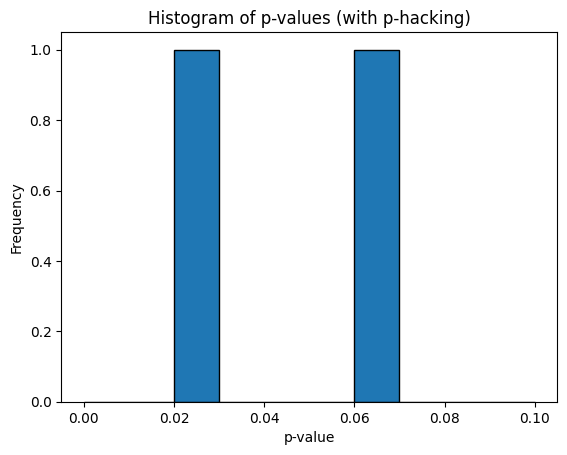

In [24]:
# ライブラリのインポート
import numpy as np
import scipy.stats as stats

# サンプルデータの作成
np.random.seed(0)  # 安定な結果を得るためにシードを設定
# 帰無仮説が真の場合のデータ（平均が同じ）
data_control = np.random.normal(0, 1, 100)
data_treatment = np.random.normal(0, 1, 100)

# p値の初期化
p_values = []

# p-hackingのシミュレーション：繰り返しtテストを実行
for _ in range(20):
    # データの一部をランダムに選択
    sample_control = np.random.choice(data_control, size=50, replace=True)
    sample_treatment = np.random.choice(data_treatment, size=50, replace=True)
    # t検定の実施
    t_stat, p_value = stats.ttest_ind(sample_control, sample_treatment)
    p_values.append(p_value)

# 計算したp値を出力
print(f"p-values: {p_values}")

# 有意水準を満たすかチェック
significant_results = [p for p in p_values if p < 0.05]
# 有意な結果の数を出力
print(f"Number of 'significant' results: {len(significant_results)}")

# t検定とp-hackingの影響を視覚化するためにヒストグラムを作成
import matplotlib.pyplot as plt

plt.hist(p_values, bins=10, range=(0, 0.1), edgecolor='black')
plt.title('Histogram of p-values (with p-hacking)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()


# クラスターA/Bテスト

クラスターA/Bテストは、通常のA/Bテストとは異なり、個々のユーザーではなく、ユーザーのグループ（クラスター）単位でテストを実施します。これにより、個々のユーザー間の相互依存性やデータのオーバーラップを最小限に抑えます。例えば、広告キャンペーンの効果を測定する際に、個々のユーザーではなく、都市やエリアといった地理的クラスターを対象に実験を行うといった方法です。使用用途としては、ユーザー間の相互作用が強く、個別のランダムアサインが難しい環境で用いられます。

数学的には、クラスターランダム化実験は $$ Y_i = \beta_0 + \beta_1 X_i + u_i + \epsilon_i $$ のようにモデル化され、ここで $Y_i$ はアウトカム変数、$X_i$ は処理変数、$u_i$ はクラスター効果、$\epsilon_i$ は誤差項です。

『Pythonで学ぶ効果検証入門』では、このようなクラスターを考慮したA/BテストをPythonで実装する方法について説明されています。

In [25]:
# クラスターA/Bテストの理論をPythonで表現する

import numpy as np
import pandas as pd

# サンプルデータ作成
np.random.seed(123)
data = pd.DataFrame({
    'cluster': np.repeat(range(10), 10),  # 10クラスター各クラスターに10個の観測
    'treatment': np.random.binomial(1, 0.5, 100),  # 処理群と制御群にランダムに割り当て
    'outcome': np.random.normal(0, 1, 100)  # 正規分布に従うアウトカム
})

# クラスターごとの平均アウトカムを表示
cluster_means = data.groupby('cluster')['outcome'].mean()
print('クラスターごとの平均アウトカム:', cluster_means)

# クラスターを考慮した線形回帰モデル
import statsmodels.formula.api as smf

model = smf.ols('outcome ~ treatment', data=data).fit()
print('回帰モデルの要約:')
print(model.summary())

# クラスターごとに集計したデータフレームの確認
cluster_data = data.groupby('cluster').mean()
print('クラスターごとの集計データ:')
print(cluster_data)

# 理論を反映したモデル式
# Y_i = \beta_0 + \beta_1 X_i + u_i + \epsilon_i の形に類似
# モデルの係数を出力し、結果を確認\print('モデルの係数:')
print(model.params)

クラスターごとの平均アウトカム: cluster
0    0.174137
1    0.030205
2   -0.100998
3    0.262597
4   -0.028026
5    0.441700
6   -0.367611
7    0.209480
8   -0.041601
9   -0.229485
Name: outcome, dtype: float64
回帰モデルの要約:
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.001853
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.966
Time:                        05:51:57   Log-Likelihood:                -139.93
No. Observations:                 100   AIC:                             283.9
Df Residuals:                      98   BIC:                             289.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
     

# チェリーピッキング

チェリーピッキング（cherry-picking）とは、データ分析や統計調査において、自分の主張や仮説に合致するデータや結果のみを選んで用い、不都合なデータや結果を無視する手法を指します。この手法は、分析結果の偏りを生み、誤った結論を導くリスクがあります。例えば、特定の薬の効果を示すデータのみを強調し、副作用のデータを無視する場合などです。

**理論的背景**:
チェリーピッキングの問題点は、データの全体像を無視することで結果の信頼性が損なわれることです。統計的な分析では、全てのデータポイントを考慮に入れることで、結果の正確性が担保されます。

**数式**:
インライン数式として、データセットの全データを $D = \{d_1, d_2, \ldots, d_n\}$ としたとき、チェリーピッキングはその部分集合 $D' \subset D$ のみを用いることを意味します。

ブロック形式では以下のように示されます。
$$
D' = \{d_i \in D \mid \text{condition}(d_i)\}
$$

**使用用途**:
人は自分の信念を裏付けるデータのみを無意識に選びがちです。このため、チェリーピッキングは注意深いデータ分析と結果の解釈において、避けるべき選択肢として認識されています。

In [26]:
# チェリーピッキングを例示するコード

# あるデータセットがあるとする
full_data = [ {'id': 1, 'value': 10}, {'id': 2, 'value': 15}, {'id': 3, 'value': -2}, {'id': 4, 'value': 20}, {'id': 5, 'value': -5} ]

print('Full data:', full_data)

# ポジティブな値のみを選別（チェリーピッキング）
positive_only = [d for d in full_data if d['value'] > 0]

print('Cherry-picked positive data:', positive_only)

# ここでは、データ全体を考慮に入れずに、ポジティブな値だけに注目してしまうことで、
# 全体の偏りをもたらす例を示しています。

# 仮説を確かめるためのデータセット全体に基づく分析も考慮
average_full = sum(item['value'] for item in full_data) / len(full_data)

print('Average of full data:', average_full)

# チェリーピッキング後の平均（なんらかの仮説検証に不適切な場合がある）
average_cherry_picked = sum(item['value'] for item in positive_only) / len(positive_only)

print('Average of cherry-picked data:', average_cherry_picked)

Full data: [{'id': 1, 'value': 10}, {'id': 2, 'value': 15}, {'id': 3, 'value': -2}, {'id': 4, 'value': 20}, {'id': 5, 'value': -5}]
Cherry-picked positive data: [{'id': 1, 'value': 10}, {'id': 2, 'value': 15}, {'id': 4, 'value': 20}]
Average of full data: 7.6
Average of cherry-picked data: 15.0


# コルモゴロフ-スミルノフ検定

コルモゴロフ-スミルノフ検定（K-S検定）は、2つの一元分布が同じであるかどうかを検定するために使用される非パラメトリックな方法です。\n\n### 理論\nコルモゴロフ-スミルノフ検定の主な目的は、同じ累積分布関数（CDF）を持つかどうかを確認することです。K-S検定では、観測データの累積分布関数（ECDF）と理論的な分布のCDFの最大差を測定します。\n\n一般的に、K-S検定は次のような方法で定義されます：\n\n$D = \sup_x |F_n(x) - F(x)|$\n\nここで、\(D\) はK-S統計量、\(F_n(x)\) は観測サンプルの累積分布関数、\(F(x)\) は理論的分布です。\n\n$$D = \sup_x |F_n(x) - F(x)|$$\n\n### 使用用途\n1. モデルフィッティング：データが特定の理論的分布に従うかどうかの確認。\n2. グッドネス・オブ・フィット：モデルの適合度を評価。\n\nK-S検定はPythonで学ぶ効果検証入門書において、特にデータの前処理や外れ値の処理、または異常検知に関連する章で利用されるかもしれません。

In [27]:
# 必要なライブラリのインポート\nfrom scipy import stats\nimport numpy as np\n\n# データサンプルを生成（正規分布に従うデータ）\ndata1 = np.random.normal(loc=0, scale=1, size=100)\ndata2 = np.random.normal(loc=0, scale=1, size=100)\n\n# printでデータを確認\nprint('Data1:', data1[:5], '...')\nprint('Data2:', data2[:5], '...')\n\n# コルモゴロフ-スミルノフ検定の実行\nks_statistic, p_value = stats.ks_2samp(data1, data2)\n\n# 結果の表示\nprint('K-S statistic:', ks_statistic)\nprint('p-value:', p_value)\n\n# 結果の解釈\nif p_value < 0.05:  # よく使用される5%有意水準\n    print('2つのサンプルは異なる分布を持つと結論付けます。')\nelse:\n    print('2つのサンプルは同じ分布に従う可能性があります。')

# 層化 A/B テスト

層化 A/B テストは、実験群と対照群を作る際に、様々な異なる層（例えば、年齢、性別、地域など）によって分割する手法です。これにより、各層でのキャンペーン効果をより正確に評価することができます。層化 A/B テストは、特に大きなグループの中に重要なサブグループが存在するときや、全体的なサンプルの偏りを少なくするために有効です。\n\n数式で表現すると、各層の平均効果は以下のようになります。\(Y_i = \frac{1}{n_i}\sum_{j=1}^{n_i} Y_{ij}\)、ここで\(Y_i\)はi番目の層の平均効果、\(n_i\)はi番目の層のサンプル数、\(Y_{ij}\)はi番目の層のj番目のサンプルの効果です。\n\nまた、全体の平均効果は層ごとの重み付き平均として表されます。\n$$ Y = \sum_{i=1}^{k} \frac{n_i}{N} Y_i $$\nここで、\(N\)は全体のサンプル数、\(k\)は層の数です。\n\nこの手法は、『Pythonで学ぶ効果検証入門』でも詳細に解説されており、実践的なデータ分析において非常に役立ちます。

In [28]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd

# サンプルデータの作成
# 年齢, 性別, グループ, 結果
np.random.seed(0)  # 乱数を固定して結果を再現性のあるものにします。
data = pd.DataFrame({
    '年齢': np.random.randint(18, 60, 100),
    '性別': np.random.choice(['男性', '女性'], 100),
    'グループ': np.random.choice(['A', 'B'], 100),
    '結果': np.random.rand(100) * 100  # サンプルの結果データ
})

# データの確認
print(data.head())

# 層化A/Bテスト: 年齢と性別を層として平均効果を計算します
# 各層を一意のカテゴリとして作成
strata = data.groupby(['年齢', '性別'])

# 結果の計算
mean_results = strata['結果'].mean()
print(mean_results.head())  # 各層の平均効果を確認

# 全体の重み付き平均を計算
n_total = len(data)
overall_effect = sum((len(group) / n_total) * mean for (group, mean) in zip(strata, mean_results))
print(f'全体の平均効果: {overall_effect}')

   年齢  性別 グループ         結果
0  18  女性    B  48.954894
1  21  男性    A  33.898512
2  21  男性    B  17.949026
3  57  女性    B  17.098660
4  27  男性    B  46.345098
年齢  性別
18  女性    50.463007
    男性    36.534071
19  女性    88.029760
    男性    63.771128
21  男性    24.111371
Name: 結果, dtype: float64
全体の平均効果: 62.8677426355358


# クラスター頑健標準誤差

### クラスター頑健標準誤差

クラスター頑健標準誤差（Cluster-Robust Standard Errors）は、データの観測単位がクラスターとして分かれている場合における誤差の相関を考慮して、標準誤差を修正したものです。通常の回帰分析では、標準誤差の算出において観測間の独立性が仮定されていますが、クラスターが存在するデータの場合、この仮定が破れ、標準誤差が過小に見積もられることがあります。

インライン数式で表すと、通常の標準誤差は$o(\sqrt{n})$で減少しますが、クラスターが存在する場合、クラスター毎に独立性を仮定し、ブロック数式で表せば、以下のように調整されます。

$$ SE_{cluster} = \sqrt{\sum_{g=1}^{G} \frac{1}{n_g} \sum_{i \in g} (e_i^2)} $$

ここで、$G$はクラスターの数、$n_g$はクラスター$g$の中の観測の数、$e_i$は誤差項です。これにより、同一クラスター内の観測間の相関を考慮した上で、より正確な標準誤差を算出することができます。

これに関する理論は、"Pythonで学ぶ効果検証入門"の中で、因果推論や回帰分析の信頼性を高める方法として解説されています。書籍では、単なる統計的手法の解説にとどまらず、そのPython実装も含めて、効果的な検証手法としての活用法を解説しています。

クラスター頑健標準誤差は具体的には例えばパネルデータや、地理的な単位でクラスター化されているデータなど、エコノメトリクスの様々な分野で利用されます。

In [ ]:
# pandas, numpy, and statsmodelsライブラリをインポートします。
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.sandwich_covariance import cov_cluster

# サンプルデータを生成します
np.random.seed(0)
n = 100  # 観測数
G = 10   # クラスターの数
data = pd.DataFrame({'X': np.random.rand(n),
                      'Z': np.random.rand(n),
                      'Cluster': np.random.choice(range(G), size=n)})
data['Y'] = 1.5 * data['X'] + np.random.randn(n)

# 最初に生成したデータを出力します
print(data.head())

# 線形回帰モデルをフィットします
model = ols('Y ~ X + Z', data).fit()

# モデルの要約を印刷します
print(model.summary())

# クラスター頑健標準誤差を計算します
cov_clustered = cov_cluster(model, groups=data['Cluster'])

# クラスター頑健標準誤差を出力します
print('Cluster Robust Standard Errors: ', np.sqrt(np.diag(cov_clustered)))

# Resultオブジェクトを生成して結果を確認できます
result = model.get_robustcov_results(cov_type='cluster', groups=data['Cluster'])
print(result.summary())

# このコードは、サンプルデータを生成し、そのデータに対して回帰モデルを適合させます。
# その後、クラスター頑健標準誤差を計算し、出力します。
# statsmodelsライブラリのcov_cluster関数を使ってクラスター頑健標準誤差を計算しています。

# 局所平均処置効果（LATE）

局所平均処置効果（LATE: Local Average Treatment Effect）は、処置を受けるか受けないかという選択がランダムではなく、別の変数（導出変数）によって部分的に制御されている場合に用いられる効果測定の指標です。特に、施策の影響を理解するための因果推論の枠組みで重要な役割を果たします。LATEは特に、コンプライアーと呼ばれる集団に対する処置の平均的な影響を測定するものです。数式で表現すると、$$ LATE = \frac{E[Y|Z=1] - E[Y|Z=0]}{E[D|Z=1] - E[D|Z=0]} $$ です。ここで、$Z$は導出変数（インストルメンタル変数）、$Y$はアウトカム、$D$は処置変数を表します。インライン数式としては $LATE = \frac{E[Y|Z=1] - E[Y|Z=0]}{E[D|Z=1] - E[D|Z=0]}$ となります。この指標は主に、無作為化実験が不可能な場面で、因果推論を行うための手段として使用されます。

In [30]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd

# サンプルデータを作成
np.random.seed(42)  # 乱数シードを設定して結果の再現性を確保
data = pd.DataFrame({
    'Z': np.random.binomial(1, 0.5, 1000),  # Zは導出変数で0と1をランダムに割り振る
    'Y': np.random.normal(loc=10, scale=2, size=1000),  # Yはアウトカム変数として正規分布に従う
    'D': np.random.binomial(1, 0.7, 1000)  # Dは処置変数で0と1をランダムに割り振る
})

# 導出変数Zによる期待値を計算
E_Y_given_Z1 = data[data['Z'] == 1]['Y'].mean()
E_Y_given_Z0 = data[data['Z'] == 0]['Y'].mean()
E_D_given_Z1 = data[data['Z'] == 1]['D'].mean()
E_D_given_Z0 = data[data['Z'] == 0]['D'].mean()

# LATEを計算
LATE = (E_Y_given_Z1 - E_Y_given_Z0) / (E_D_given_Z1 - E_D_given_Z0)

# 結果を出力
print(f'E[Y|Z=1]: {E_Y_given_Z1}')
print(f'E[Y|Z=0]: {E_Y_given_Z0}')
print(f'E[D|Z=1]: {E_D_given_Z1}')
print(f'E[D|Z=0]: {E_D_given_Z0}')
print(f'LATE: {LATE}')

# このコードでは、サンプルデータを生成し、LATEを計算しています。
# E[Y|Z=1] と E[Y|Z=0] は Z が 1のときと 0のときの Y の平均を意味し、
# E[D|Z=1] と E[D|Z=0] は同様に D の平均を意味します。
# LATE は (E[Y|Z=1] - E[Y|Z=0]) / (E[D|Z=1] - E[D|Z=0]) で計算されることを示しています。

E[Y|Z=1]: 10.162752530833421
E[Y|Z=0]: 10.23241277946874
E[D|Z=1]: 0.6841046277665996
E[D|Z=0]: 0.7276341948310139
LATE: 1.6002972998154872


# 交差項

交差項（Interaction term）は、回帰分析やその他の統計モデルにおいて、二つ以上の独立変数の相互作用を表現するために使われる項です。効果検証においては、どのように変数間の関係がアウトカム変数に影響を与えるかを理解する際に用いられます。交差項を含めることで、二つの変数が同時に変化する際の影響を捉えることができ、これにより単独の影響だけでなく相互作用の影響も評価できます。数学的には、独立変数 \( X_1 \) と \( X_2 \) の交差項は通常、それらを掛け合わせた形で表現されます。

- インライン数式による表現: $X_1 \times X_2$
- ブロック数式としては、
  $$
  X_1 \times X_2
  $$

交差項は、特に応答変数がある水準を超えたときに効果が変わる場合や、異なるグループ間で効果が異なる場合をモデル化する時に非常に有用です。

Pythonで『Pythonで学ぶ効果検証入門』などの書籍を通して学ぶ場合、交差項は多重回帰分析の実例を通してその意義と使い方が説明されています。このような操作は、`pandas`や`statsmodels`を用いて実装されることが一般的です。

In [31]:
# 必要なライブラリのインポート
import pandas as pd
import statsmodels.formula.api as smf

# サンプルデータフレームの作成
# ここでは、X1, X2が独立変数で、Yが従属変数という仮定
# X1とX2の交差項も含めて計算します

data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [5, 4, 3, 2, 1],
    'Y': [1.5, 2.5, 3.5, 4.5, 5.5]
}
df = pd.DataFrame(data)

# データフレームの内容を表示
print('Original DataFrame:')
print(df)

# statsmodelsを使用して回帰分析を実行
# 交差項はC()を用いることで、X1とX2の相互作用を指定します
model = smf.ols(formula='Y ~ X1 + X2 + I(X1*X2)', data=df).fit()

# 回帰分析の結果を表示
print('\nRegression Summary:')
print(model.summary())

# 交差項がどのようにデータセットに追加されるかの例
# 新しい列 'X1*X2' を作成して確認
print('\nDataFrame with Interaction Term (X1*X2):')
df['X1*X2'] = df['X1'] * df['X2']
print(df)

Original DataFrame:
   X1  X2    Y
0   1   5  1.5
1   2   4  2.5
2   3   3  3.5
3   4   2  4.5
4   5   1  5.5

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.679e+28
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.15e-29
Time:                        05:52:19   Log-Likelihood:                 157.76
No. Observations:                   5   AIC:                            -309.5
Df Residuals:                       2   BIC:                            -310.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# 二元配置固定効果（two way fixed effect)

二元配置固定効果モデル（Two-Way Fixed Effects Model）は、観測対象間の固定的な特性（個体効果）だけでなく、同一の時期内で影響を及ぼす可能性のある特性（時点効果）を取り入れることができます。これにより未観測の変数が分析結果に及ぼす影響を制御することが可能です。このモデルは、観測されたデータ内の誤差項を均等に扱わないことで、より正確な効果を抽出することができます。

理論的には、二元配置固定効果は次のような形で数学的に表されます。
インライン数式で表すと、$y_{it} = \alpha + \beta X_{it} + \gamma_i + \delta_t + \epsilon_{it}$ となります。

ブロック数式で表すと、
$$
y_{it} = \alpha + \beta X_{it} + \gamma_i + \delta_t + \epsilon_{it}
$$
ここで、$\gamma_i$ は個体固有の効果、$\delta_t$ は時点に関連する効果、$\epsilon_{it}$ は誤差項を指します。

このモデルは主に、特定の産業や地域に固有の特性がある場合の経済学研究や、パネルデータを用いた政策評価などの分野で使用されます。

Pythonで学ぶ効果検証入門では、こうした固定効果モデルをPythonライブラリを用いて実装する方法が紹介されています。この知識は、統計モデリングや因果推論のアプローチを実践するための基礎となります。

In [ ]:
# 必要なライブラリをインポートします
import pandas as pd
import statsmodels.api as sm

# サンプルデータの作成
# ここでは、時点（year）、個体（entity）、説明変数（X）、目的変数（y）を含むデータフレームを作成します
data = pd.DataFrame({
    'entity': [1, 1, 1, 2, 2, 2],
    'year': [1, 2, 3, 1, 2, 3],
    'X': [10, 15, 20, 10, 15, 20],
    'y': [100, 150, 200, 110, 160, 210]
})

# データ内容を出力
print('サンプルデータ:')
print(data)

# エンティティと時点のダミー変数を作成
entity_dummies = pd.get_dummies(data['entity'], prefix='entity', drop_first=True)
year_dummies = pd.get_dummies(data['year'], prefix='year', drop_first=True)

# 説明変数の準備
X = pd.concat([data['X'], entity_dummies, year_dummies], axis=1)
X = sm.add_constant(X)  # 定数項を追加

# 目的変数
y = data['y']

# デザインマトリックスと目的変数を出力
print('\nデザインマトリックス:')
print(X)
print('\n目的変数:')
print(y)

# フィッティングモデル
model = sm.OLS(y, X).fit()

# 結果を出力
print('\nモデルの要約:')
print(model.summary())

# このコードはデザインマトリックスを構築し、二元配置固定効果モデルをフィットする方法を示します。
# サンプルデータは単純な形で作成されていますが、実際にはより大きなパネルデータセットでの実行を想定しています。



# rdrobustライブラリ

rdrobustライブラリは、回帰不連続デザイン (Regression Discontinuity Design, RDD) に基づく分析を行うためのライブラリです。回帰不連続デザインは統計学や計量経済学における手法の一つで、介入の効果を推定するのに用いられます。この手法は、変数が特定の閾値で変化する点（ディスコンティニュイティ）を利用して因果関係を推定します。

## 理論
RDDの理論は、介入の割り当てが変数の連続的な部分ではなく不連続な部分で行われる場合、介入の効果をより正確に推定できるというものです。例えば、テストのスコアが40点以上なら奨学金が受けられるといった状況を考えることができます。この場合、40点が閾値となり、その前後のスコアを持つ人々のグループ間での差異を分析することで、奨学金の効果を測定できます。

数式で表すと、介入後の結果を $Y_i$、介入前の結果を $X_i$ とし、閾値を $c$ とします。RDDの基礎モデルは以下のように示されます。

$$Y_i = \alpha + \tau D_i + \beta (X_i - c) + \varepsilon_i$$

ここで、$D_i$ は $X_i \geq c$ である場合に1、それ以外の場合は0の指示変数です。$\tau$ は関心のある介入効果を表します。

## 使用用途
rdrobustは、RDDを用いた推定に必要な様々な機能を提供します。具体的には、バンド幅の選択、推定量の算出、標準誤差の計算、そして視覚化といった分析の各ステージをサポートします。『Pythonで学ぶ効果検証入門』では、このライブラリを使ってRDDの理論と実際のデータへの応用方法を紹介しています。

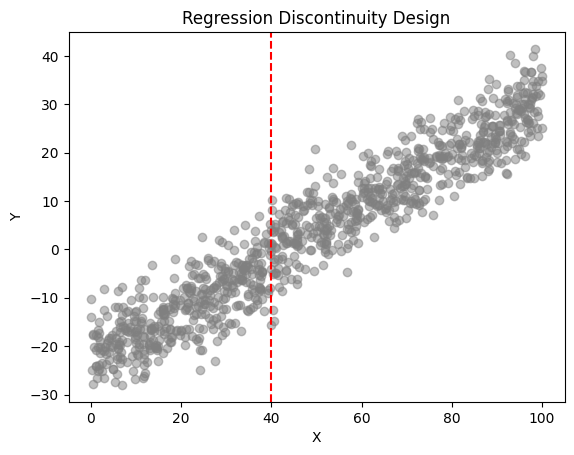

Xの最初の10個: [54.88135039 71.51893664 60.27633761 54.4883183  42.36547993 64.58941131
 43.75872113 89.17730008 96.36627605 38.34415188]
Yの最初の10個: [  6.93218882  15.85586524  19.38612504   6.17332587  -1.31234322
  12.40146177  -2.71620666  25.55241928  26.35786194 -12.7845618 ]


In [33]:
# 必要なライブラリをインポート
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成
# X: 独立変数, Y: 従属変数
np.random.seed(0)
X = np.random.uniform(0, 100, 1000)  # 0から100の間の一様分布
Y = 2 + 3 * (X >= 40) + 0.5 * (X - 50) + np.random.normal(0, 5, 1000)

# 散布図をプロットし、RDDの視覚化
plt.scatter(X, Y, alpha=0.5, c="gray")
plt.axvline(x=40, color="red", linestyle="--")  # 閾値をプロット
plt.title("Regression Discontinuity Design")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 変数の確認
print(f"Xの最初の10個: {X[:10]}")
print(f"Yの最初の10個: {Y[:10]}")

# rdrobustライブラリを使用したRDD分析はここでは行っていないが、
# 上記で生成したデータは分析に適した形となっている。
# このデータを元に、rdrobustを用いて回帰の実施が可能。

# アウトカム

アウトカムとは、特定の処置や介入によって得られる結果や影響を指します。この概念は因果推論や効果検証において重要な役割を果たします。例えば、医療における治療の効果を検証する際の患者の健康状態や学力向上の介入による試験スコアなどが挙げられます。一般的に、アウトカムは数学的には変数として扱われることが多く、特定の処置による期待される変化を統計的に追跡します。

インライン数式としては、例えば$Y$がアウトカム変数を表すとします。

ブロック数式は次の通りです：
$$Y = f(X) + \epsilon$$
ここで、$Y$はアウトカム、$X$は説明変数、$f(X)$は$X$に基づくモデル、$\epsilon$は誤差項を示します。

In [34]:
# Pythonで基本的なアウトカムの概念を理解するためのコード例

# 例えば、教育介入による試験スコアをアウトカムとする
import numpy as np
import pandas as pd

# 介入前後の試験スコアデータを生成する
np.random.seed(0)  # 再現性のために乱数の種を設定
pre_intervention_scores = np.random.normal(70, 10, 100)  # 介入前のスコア
post_intervention_scores = pre_intervention_scores + np.random.normal(5, 3, 100)  # 介入後のスコア

# データをDataFrameにまとめる
scores_df = pd.DataFrame({
    'Pre-Intervention': pre_intervention_scores,
    'Post-Intervention': post_intervention_scores
})

# データの確認
print(scores_df.head())  # 上位5件のデータを表示

# 平均の変化を見ることで効果を確認
mean_change = scores_df['Post-Intervention'].mean() - scores_df['Pre-Intervention'].mean()

# 平均変化を出力
print(f'Mean change in scores: {mean_change}')


   Pre-Intervention  Post-Intervention
0         87.640523          98.289976
1         74.001572          74.958295
2         79.787380          80.975925
3         92.408932         100.317122
4         88.675580          90.156210
Mean change in scores: 5.24603891224352


# パラレルトレンド仮定

パラレルトレンド仮定は、主に計量経済学で差分に差分法（DiD）を用いる際に必要となる仮定です。差分に差分法は、ある処置や介入が行われた後の影響を測定するために用いられ、処置群と対照群の結果の変化を比較する手法です。ここで重要なのは、処置が行われなかった場合、処置群と対照群は同じトレンドをたどったであろうという仮定を置くことです。これがパラレルトレンド仮定です。この仮定が成り立つことにより、処置の効果を正確に推定することができます。数式で表すと、処置群の平均変化 $\Delta Y_t^{treatment}$ と対照群の平均変化 $\Delta Y_t^{control}$ の間に処置が無かった場合の平行トレンドが仮定されます。

インライン数式: $\Delta Y_t^{treatment} = \Delta Y_t^{control} + \text{{treatment effect}}$

ブロック数式:
$$
\Delta Y_t^{treatment} = \Delta Y_t^{control} + \text{treatment effect}
$$

**使用用途**: パラレルトレンド仮定は、政策評価やマーケティング分析、医療研究など、さまざまな分野での介入効果の測定に利用されます。特に質が高い非ランダム化試験の代替手段として有効です。

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Example data creation
np.random.seed(0)
dates = pd.date_range('20210101', periods=8)
data = pd.DataFrame({
    'date': dates,
    'group': ['control']*4 + ['treatment']*4,
    'outcome': np.random.randn(8) + 5
})

# Adding a treatment effect to the treatment group
data.loc[data['group'] == 'treatment', 'outcome'] += 2

# Print the initial dataset
data_before = data.copy()
print('Initial Data:')
print(data_before)

# Calculate means
control_mean_before = data_before[data_before['group'] == 'control']['outcome'].mean()
treatment_mean_before = data_before[data_before['group'] == 'treatment']['outcome'].mean()

print('\nControl group mean before treatment:', control_mean_before)
print('Treatment group mean before treatment:', treatment_mean_before)

# After treatment - apply some hypothetical changes
change = np.array([0.5, 1.0, 0.5, 0.3, 2.5, 3.0, 2.5, 2.3])
data['outcome'] += change

# Print the updated dataset
data_after = data.copy()
print('\nData after treatment changes:')
print(data_after)

# Calculate means after intervention
control_mean_after = data_after[data_after['group'] == 'control']['outcome'].mean()
treatment_mean_after = data_after[data_after['group'] == 'treatment']['outcome'].mean()

print('\nControl group mean after treatment:', control_mean_after)
print('Treatment group mean after treatment:', treatment_mean_after)

# Calculate the differences
control_diff = control_mean_after - control_mean_before
treatment_diff = treatment_mean_after - treatment_mean_before

treatment_effect = treatment_diff - control_diff
print('\nEstimated treatment effect using DiD:', treatment_effect)

# The code demonstrates the Difference in Differences (DiD) method analysis, calculating treatment effect

Initial Data:
        date      group   outcome
0 2021-01-01    control  6.764052
1 2021-01-02    control  5.400157
2 2021-01-03    control  5.978738
3 2021-01-04    control  7.240893
4 2021-01-05  treatment  8.867558
5 2021-01-06  treatment  6.022722
6 2021-01-07  treatment  7.950088
7 2021-01-08  treatment  6.848643

Control group mean before treatment: 6.345960184410521
Treatment group mean before treatment: 7.422252829875362

Data after treatment changes:
        date      group    outcome
0 2021-01-01    control   7.264052
1 2021-01-02    control   6.400157
2 2021-01-03    control   6.478738
3 2021-01-04    control   7.540893
4 2021-01-05  treatment  11.367558
5 2021-01-06  treatment   9.022722
6 2021-01-07  treatment  10.450088
7 2021-01-08  treatment   9.148643

Control group mean after treatment: 6.9209601844105215
Treatment group mean after treatment: 9.997252829875361

Estimated treatment effect using DiD: 1.9999999999999991


# McCrary の検定

### McCraryの検定について

McCraryの検定は、回帰不連続デザイン（RDD）において、処置を受けた群と受けていない群の間で変数の値がジャンプしていないか確認するための方法です。
特に、処置を行う際の閾値の周辺でデータの分布が滑らかであるかどうかを検証します。

インライン数式で表現すると、密度関数のジャンプを検証します： $\lim_{x \to c^-} f(x) \neq \lim_{x \to c^+} f(x)$。

ブロック数式で表現すると、
$$
\text{null hypothesis: } \lim_{x \to c^-} f(x) = \lim_{x \to c^+} f(x)
$$
この検定を使うことで、閾値における無自覚なデータ操作が無いかを確認することができます。

### 使用用途
この検定は、選挙や試験の合格ライン周辺で行われる政策評価、教育政策の効果検証において使われます。データの滑らかさが保証された場合、RDDの結果の信頼性が向上します。

サンプルデータの一部: [-0.10321885  0.4105985   0.14404357  1.45427351  0.76103773  0.12167502
  0.44386323  0.33367433  1.49407907 -0.20515826]
group1: 524 group2: 476
Density at cutoff for group1: [0.3831758]
Density at cutoff for group2: [0.41870139]


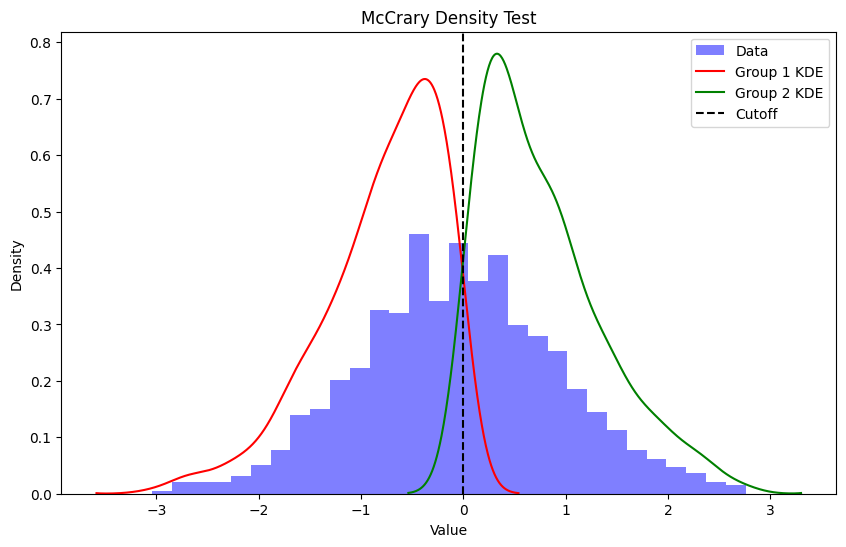

In [36]:
# McCrary の検定を実施するための Python コード例
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate

# サンプルデータを生成（ランダムデータ）
data = np.random.normal(loc=0.0, scale=1.0, size=1000)
cutoff = 0.0

# サンプルデータの確認
print('サンプルデータの一部:', data[:10])

# データを閾値に基づいて二つのグループに分ける
group1 = data[data < cutoff]
group2 = data[data >= cutoff]

# 各グループのデータ数
print('group1:', len(group1), 'group2:', len(group2))

# KDE（カーネル密度推定）を使用して密度推定を行う
kde1 = KDEUnivariate(group1)
kde2 = KDEUnivariate(group2)
kde1.fit()  # group1 に対する KDE
kde2.fit()  # group2 に対する KDE

# 閾値における密度の推定を確認
print('Density at cutoff for group1:', kde1.evaluate(cutoff))
print('Density at cutoff for group2:', kde2.evaluate(cutoff))

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Data')
plt.plot(kde1.support, kde1.density, label='Group 1 KDE', color='r')
plt.plot(kde2.support, kde2.density, label='Group 2 KDE', color='g')
plt.axvline(x=cutoff, color='k', linestyle='--', label='Cutoff')
plt.title('McCrary Density Test')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# ここでは KDE を用いた密度推定プロットを用いて、
# 閾値における密度がグループ間で大きく異なるか確認する。

# バランステスト

バランステストは、実験や観察研究における集団の特徴が、異なるグループ間で均等に分布しているかを確認するために行われる統計的手法です。例えば、ランダム化試験では、処置群と対照群の間で年齢や性別といった共変量がバランスしているかを確認することが必要です。バランステストを行うことで、各群間の比較が公平となることを確認し、偏りを排除できます。具体的には、各グループの平均値や分散、または中央値などの統計量が一致しているかを確認します。

バランステストにおいて、統計的には以下のように数式で表すことが可能です。
インライン数式として、例えば$t\mathrm{-test}$：$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$。

ブロック数式としては
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$
があります。ここで、$\bar{X}_1$と$\bar{X}_2$はそれぞれのグループの平均値、$s_p$は標準誤差、$n_1$と$n_2$は各グループのサンプルサイズです。

この手法は、「Pythonで学ぶ効果検証入門」と関連し、ランダム化比較試験や観察研究でのデータ分析の前処理や結果の精度向上に役立ちます。

In [37]:
# 必要なライブラリをインポート
import numpy as np
from scipy import stats

# データの用意 (例としてランダムに生成)
# グループ1: 50人のデータ
np.random.seed(0)
group1 = np.random.normal(50, 10, 50)
print("Group 1:", group1)

# グループ2: 50人のデータ
# 平均値が同じならば、バランスしているとみなせる
np.random.seed(1)
group2 = np.random.normal(50, 10, 50)
print("Group 2:", group2)

# バランステストの実行 (t-testを例に)
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# 結果の解釈
if p_value < 0.05:
    print("群間に統計的に有意な差があります。")
else:
    print("群間に統計的に有意な差はありません。")

# データが正規分布に従う場合、平均が一致しているかを見る
# p-valueが0.05以上であれば、バランスが取れていると言える

Group 1: [67.64052346 54.00157208 59.78737984 72.40893199 68.6755799  40.2272212
 59.50088418 48.48642792 48.96781148 54.10598502 51.44043571 64.54273507
 57.61037725 51.21675016 54.43863233 53.33674327 64.94079073 47.94841736
 53.13067702 41.45904261 24.47010184 56.53618595 58.64436199 42.5783498
 72.69754624 35.45634325 50.45758517 48.1281615  65.32779214 64.6935877
 51.54947426 53.7816252  41.12214252 30.19203532 46.52087851 51.56348969
 62.30290681 62.02379849 46.12673183 46.97697249 39.51447035 35.79982063
 32.93729809 69.50775395 44.90347818 45.61925698 37.4720464  57.77490356
 33.86102152 47.8725972 ]
Group 2: [66.24345364 43.88243586 44.71828248 39.27031378 58.65407629 26.98461303
 67.44811764 42.38793099 53.19039096 47.50629625 64.62107937 29.39859291
 46.77582796 46.15945645 61.33769442 39.00108733 48.27571792 41.22141582
 50.42213747 55.82815214 38.99380823 61.4472371  59.01590721 55.02494339
 59.00855949 43.16272141 48.77109774 40.64230566 47.3211192  55.30355467
 43.083392

# Sharp RDD

### Sharp RDDの解説

**概要**

Sharp Regression Discontinuity Design (Sharp RDD)は因果推論の方法の一つで、特にしきい値を境にして処遇群と対照群が分けられている場合に用いられます。この手法は介入の効果を推定したいときに、介入がしきい値によって明確に決定されるという特徴を持っています。

**理論と数式**

Sharp RDDでは次のようなモデルを考えます。

- 因果効果を評価するための従属変数を $Y$ とし、しきい値を境にどちらの群に属するかを決定する独立変数を $X$ とします。
- あるしきい値 $c$ を境に $X_i \geq c$ ならば処遇群、$X_i < c$ ならば対照群となります。

式で表すと次のようになります。

$$
Y_i = \begin{cases}
Y_{0i} & \text{if } X_i < c \\
Y_{1i} & \text{if } X_i \geq c
\end{cases}
$$

$Y_{0i}$は対照群の場合の結果、$Y_{1i}$は処遇群の場合の結果を表します。

**使用用途**

- 教育分野でのプログラムの効果を検証する際に、特定のスコアを基準にして参加が決定されるとき。
- 経済政策の評価で、収入や資産のしきい値を基に助成金の対象を決定する場合。

**Pythonで学ぶ効果検証入門との関係性**

書籍『Pythonで学ぶ効果検証入門』では、このような因果効果を推定するための様々な手法が紹介されており、Sharp RDDの実装についても学ぶことができます。この手法を用いることで因果関係を定量的に分析する力を養うことができます。

In [ ]:
# Sharp RDDを理解するためのPythonコード

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# サンプルデータの生成
np.random.seed(0)
N = 100  # サンプルサイズ
X = np.random.uniform(0, 100, N)  # 独立変数Xを[0,100]の一様分布から生成

# しきい値c
c = 50

# Yの生成
Y = (X >= c) * (2 * X + np.random.normal(0, 10, N)) + (X < c) * (X + np.random.normal(0, 10, N))

# データの可視化
plt.scatter(X, Y, alpha=0.5)
plt.axvline(c, color='red', linestyle='--')  # しきい値を表示
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sharp RDD Example')
plt.show()

# Xと一定項の行列を作成
X = sm.add_constant(X)

# 回帰モデルの推定
model = sm.OLS(Y, X)
results = model.fit()

print("回帰係数：", results.params)
print("イテレーションの総数：", results.mle_retvals['iterations'])
print("回帰分析の結果概要")
print(results.summary())

# 結果を表示します
print("回帰モデルからの予測値を計算し、結果を確認\n")
Y_pred = results.predict(X)
print(Y_pred)

# 実データと予測値の比較
plt.scatter(X[:, 1], Y, alpha=0.5, label='Actual')
plt.plot(X[:, 1], Y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

# Fuzzy RDD

### Fuzzy RDDの解説

Fuzzy RDD（Fuzzy Regression Discontinuity Design）は、回帰不連続デザイン（RDD）の拡張の一つです。RDDは、特定の閾値を境に処置や介入（treatment）の受け手と非受け手が分かれる場合に、その処置の因果効果を測定するための手法です。通常のRDDはSharp RDDとも呼ばれ、これは閾値を境に処置の受け手と非受け手が明確に分かれる場合を扱います。

一方で、Fuzzy RDDは、閾値を越えても100%確実に処置が実施されるわけではなく、確率的に処置が行われる場合に適用されます。この状況では、処置の受け手と非受け手が僅かに混ざるため、この名前（Fuzzy）がついています。

#### 理論と数式

Fuzzy RDDは実質的には、完全に分かれていない（Fuzzyな）処置割り当ての影響を調整するためにインスツルメンタル変数法（IV: Instrumental Variables）を使用します。

まず、処置を受ける確率を決定するための関数 \( D \) を定義し、
$$ D = \begin{cases} 1 & \text{if } Z \geq 0 \\ 0 & \text{otherwise} \end{cases} $$
ここで、\( Z \) はポイント（例えば試験の得点など）で、閾値は0です。実際の処置受領は、確率に基づいて決定されるため、以下のようにモデル化されます。

$$ T = D \cdot p + (1 - D) \cdot (1 - p) $$

ここで、\(p\)は処置を受ける確率です。


そして、効果の推定には、観測された結果 \( Y \) が用いられます。

$$ Y = \alpha + \beta T + \epsilon $$
ここで、\( \beta \) は推定される介入効果であり、\( \alpha \) と \( \epsilon \) は定数項と誤差項です。

#### 使用用途

Fuzzy RDDは、教育、医療、公共政策などの分野で頻繁に使用されます。例えば、教育での成績によって奨学金が与えられる場合で、成績が基準を僅かに超えた場合にのみ奨学金が与えられるかどうかを検証するのに役立ちます。観察データで自然に発生する閾値を利用するため、実験が不可能な場合や非倫理的な場合での因果推定に有用です。

'Pythonで学ぶ効果検証入門'の中では、この概念がどのように実装され、応用されるかが実例とともに説明されています。これはデータ解析や機械学習、経済学の領域における因果関係の検証に特化したテクニックの理解を深める一助となるでしょう。

In [39]:
# Fuzzy RDDの概念をPythonでシミュレーションする。
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# データのサイズ
np.random.seed(42)
N = 1000

# ポイント（Z）を生成
Z = np.random.uniform(-1, 1, N)

# 閾値
threshold = 0.0

# 処置の受け手（D）を定義
D = (Z >= threshold).astype(int)

# 真の処置受ける確率 p を設定
p = 0.8

# 実際の処置（T）は確率的にDに依存
T = (np.random.rand(N) < (D * p + (1 - D) * (1 - p))).astype(int)

# 結果のベースライン
alpha = 2.0

# 処置効果
beta = 3.5

# 結果（Y）を計算
Y = alpha + beta * T + np.random.normal(size=N)

# Y, Z, Tを出力
print("Z (ポイント): ", Z[:10])
print("D (予測される処置受け手): ", D[:10])
print("T (実際の処置): ", T[:10])
print("Y (観測結果): ", Y[:10])

# プロット
plt.figure(figsize=(10, 6))
plt.scatter(Z[T == 1], Y[T == 1], color='red', alpha=0.5, label='T=1 (Treated)')
plt.scatter(Z[T == 0], Y[T == 0], color='blue', alpha=0.5, label='T=0 (Untreated)')
plt.axvline(threshold, color='green', linestyle='--', label='Threshold')
plt.title('Fuzzy RDD Simulation')
plt.xlabel('Z (Running Variable)')
plt.ylabel('Y (Outcome)')
plt.legend()
plt.show()

# 効果を推定する（ここでは簡易にOLSで行う）
X = sm.add_constant(T)
model = sm.OLS(Y, X).fit()

# 推定されたパラメータを出力
effect_estimation = model.params
print('推定された係数（alpha, beta）:
', effect_estimation)

SyntaxError: unterminated string literal (detected at line 57) (<ipython-input-39-8919441e5e48>, line 57)

# as-if 条件

### As-if 条件の解説

As-if 条件とは、因果推論の文脈において、処置群と対照群がランダムに割り当てられたかのように扱うことができる状況を指します。つまり、外部の要因によって偏りが生じていないと仮定できる場合のことです。この仮定が成り立つとき、それは因果効果の推定をより厳密に行うことができます。

#### 理論

As-if 条件は通常、自然実験、準実験、あるいは観察研究の文脈で適用されます。この条件が成り立つと仮定できれば、ランダム化実験と同様に、因果推論が行いやすくなります。この条件下では、不均一な因子の影響をコントロールすることができ、因果効果のより正確な推定が可能となります。

数式的には、もし \( X \) が処置割り当て、\( Y \) が結果であるとすると、as-if 条件とは以下のように表現できます：
- インライン数式: $E[Y(0)|X=1] = E[Y(0)|X=0]$
- ブロック数式:
$$
E[Y(0)|X=1] = E[Y(0)|X=0]
$$
これはつまり、処置群と対照群の潜在結果の期待値が等しいことを意味します。

#### Pythonで学ぶ効果検証入門との関係性

書籍『Pythonで学ぶ効果検証入門』においては、このas-if 条件を用いた因果効果の検証方法が記載されています。具体的には、Pythonを用いた分析により、どのようにこの条件下での因果関係を識別するかが解説されています。

#### 使用用途

As-if 条件は、完全なランダム化が難しい実験の代替として使われます。この方法は、観察データしか得られない状況での因果推論において特に有効です。社会科学、経済学、公衆衛生などの分野で広く利用されています。

In [40]:
# Pythonコードにおけるas-if条件の理解

# 必要なライブラリをインポート
import numpy as np
import pandas as pd

# ダミーデータの作成
# ここでは、治療変数Xと結果変数Yを持つ例を考えます。
np.random.seed(0)  # 再現性のためのシード値設定
N = 100  # サンプルサイズ

# 処置群と対照群にランダムに割り当て
X = np.random.binomial(1, 0.5, N)

# 結果変数Yはランダムな正規分布に基づいて生成
Y = 2 * X + np.random.normal(0, 1, N)

# DataFrameの作成
data = pd.DataFrame({'Treatment': X, 'Outcome': Y})

# 処置群と対照群の期待値を表示
mean_Treatment1 = data[data['Treatment'] == 1]['Outcome'].mean()
mean_Treatment0 = data[data['Treatment'] == 0]['Outcome'].mean()

print(f"処置群の平均結果値: {mean_Treatment1}")
print(f"対照群の平均結果値: {mean_Treatment0}")

# 平均値が似ているかどうか確認
# 実際のデータではas-if条件の成立を示す必要があります
similar_mean = np.isclose(mean_Treatment1, mean_Treatment0, atol=0.5)

print(f"処置群と対照群の平均値が似ているか: {similar_mean}")

# データフレームの先頭部分を表示
print(data.head())

# ここではatol=0.5での閾値を設定しており、これは単なる例示です。
# 実際の分析ではas-if条件が成立するかどうかの厳密な検証が重要です。

処置群の平均結果値: 2.138006505528484
対照群の平均結果値: 0.2445316791532691
処置群と対照群の平均値が似ているか: False
   Treatment   Outcome
0          1  0.834850
1          1  2.900826
2          1  2.465662
3          1  0.463756
4          0  1.488252


# 密度関数

密度関数とは、確率密度関数（Probability Density Function, PDF）とも呼ばれ、確率論や統計学において、連続型の確率変数がある範囲に値をとる確率を記述するための関数です。

インライン数式として、確率密度関数 $f(x)$ は以下の条件を満たします。$\int_{-\infty}^{\infty} f(x) \, dx = 1$。

ブロック数式で表すと、
$$ \int_{-\infty}^{\infty} f(x) \, dx = 1 $$
となります。

確率密度関数は特定の値を取る確率を示すのではなく、ある範囲内に確率変数が存在する可能性を示します。例えば、正規分布では確率密度関数はベル型の曲線を描きます。

Pythonで学ぶ効果検証入門では、密度関数を利用して集計データの分布を視覚化することや、仮説検定を実施するための基礎知識として活用します。これは統計的検証やデータの理解を深めるために有用です。

密度関数は、データサイエンスや機械学習など広範な分野で使用され、データの分布を把握するためによく用いられます。具体的な応用例としては、異常検知やパターン認識などがあります。

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas

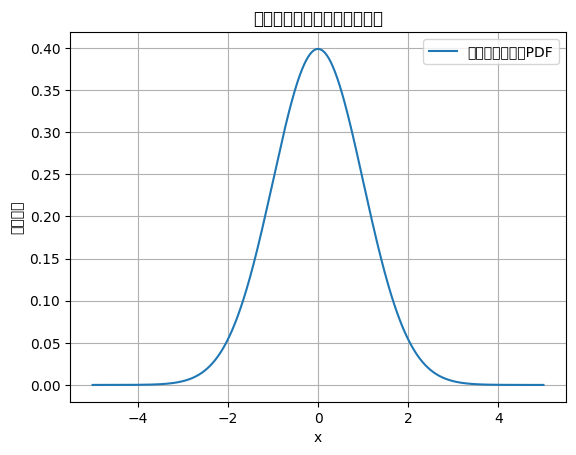

mu: 0
sigma: 1
x: [-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991] ... [4.90990991 4.91991992 4.92992993 4.93993994 4.94994995 4.95995996
 4.96996997 4.97997998 4.98998999 5.        ]
pdf: [1.48671951e-06 1.56294518e-06 1.64291438e-06 1.72680223e-06
 1.81479157e-06 1.90707332e-06 2.00384677e-06 2.10531999e-06
 2.21171010e-06 2.32324372e-06] ... [2.32324372e-06 2.21171010e-06 2.10531999e-06 2.00384677e-06
 1.90707332e-06 1.81479157e-06 1.72680223e-06 1.64291438e-06
 1.56294518e-06 1.48671951e-06]


In [41]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 標準正規分布の確率密度関数を生成
mu, sigma = 0, 1  # 平均(mu)と標準偏差(sigma)
x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)

# PDFをプロット
plt.plot(x, pdf, label='標準正規分布のPDF')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('標準正規分布の確率密度関数')
plt.legend()
plt.grid(True)
plt.show()

# 各変数の値を出力して確認
print("mu:", mu)
print("sigma:", sigma)
print("x:", x[:10], "...", x[-10:])  # xの一部を表示
print("pdf:", pdf[:10], "...", pdf[-10:])  # pdfの一部を表示

# コードは、標準正規分布の確率密度関数を計算し、プロットしています。
# muは平均、sigmaは標準偏差であり、それぞれの変数がプロットや計算でどのように影響するか確認できます。

# diagnostic tests

診断テスト (diagnostic tests) は、特定のモデルや分析手法が適切にデータを説明しているか、仮定が満たされているかを確認するための手法です。効果検証の文脈では、主に無作為化試験や因果推論の設定でその有効性を確認するのに用いられます。診断テストでは、モデルのフィットの良さ、残差の解析、過剰適合の回避などが含まれます。数式的には、例えば線形回帰モデルにおける残差の分布が正規分布に従っているかどうかを確認するためのシャピロ・ウィルク検定などが挙げられます。使用用途としては、モデルの仮定が満たされていない場合にはそれを修正したり、異なるモデルを選択するための根拠となります。

例えば、モデルの残差が正規分布に従うかどうかを検証するテストとしてシャピロ・ウィルク検定があります。この方法を数式として示すと以下のようになります：

インライン数式：この検定では、帰無仮説として残差が正規分布に従うことを仮定し、この仮説が否定される(P値が十分に小さい)場合、残差が正規分布からずれていると推定されます。

ブロック数式：$$W = \frac{(\sum w_i x_{(i)})^2}{\sum (x_i - \bar{x})^2}$$
ここで、\(w_i\) は特定の順位統計量に基づく重みで、\(x_{(i)}\) はデータの順位付けされた観測値を指します。この値を基にシャピロ・ウィルク検定を行い、P値を算出します。

In [42]:
# 必要なライブラリをインポートします
import numpy as np
import scipy.stats as stats

# ここでは、仮のデータを用いてシャピロ・ウィルク検定を行います
# まずは正規分布に従うデータセットを生成
np.random.seed(0)  # 再現性のためにシードを固定
sample_data = np.random.normal(0, 1, 100)

# データを出力して目視で確認
print("Sample Data:", sample_data)

# シャピロ・ウィルク検定を実行します
shapiro_test = stats.shapiro(sample_data)

# 検定統計量とP値を出力
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# P値に基づき、帰無仮説を検証
if shapiro_test.pvalue > 0.05:
    print("帰無仮説を棄却できません: データは正規分布です。")
else:
    print("帰無仮説を棄却します: データは正規分布ではありません。")

#このコードは、データが正規分布に従うかどうかを確認するためにシャピロ・ウィルク検定を実行します。
#P値が0.05より大きければデータは正規分布に従うと判断します。

Sample Data: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  

# 処置確率

処置確率（Treatment Probability）とは、単位が処置（例えば、新しい薬やマーケティングキャンペーン）を受ける確率のことを指します。処置確率は、効果検証のセクションで、特に因果推論の文脈で重要です。理論的には、処置確率は次のように表されます：

- インライン形式: $p(T=1|X)$
- ブロック形式: $$p(T=1|X)$$

ここで、$T=1$は処置群であることを示し、$X$は共変量を表します。

Pythonで学ぶ効果検証入門では、処置確率を用いて処置を受けた場合と受けなかった場合の効果の推定を行います。その用途としては、

1. バイアスの調整 - 処置群と対照群の間で非ランダムな差が存在する場合、処置確率を用いてバイアスを調整できます。
2. マッチングやウェイト付け - 処置確率を計算して、類似の個体同士をマッチングまたは重み付けを実行することができます。

In [43]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# データフレーム作成例
np.random.seed(0)
data = pd.DataFrame({
    'age': np.random.randint(20, 70, size=100),
    'income': np.random.randint(20000, 80000, size=100),
    'treatment': np.random.binomial(1, 0.5, size=100)
})

print("\nデータ例\n", data.head())

# 処置確率の計算（ロジスティック回帰を利用）
X = data[['age', 'income']]
y = data['treatment']

log_reg = LogisticRegression()
log_reg.fit(X, y)

data['treatment_probability'] = log_reg.predict_proba(X)[:, 1]

print("\n処置確率の例\n", data[['age', 'income', 'treatment_probability']].head())

# 処置確率を用いた重み付けによる因果推論 - ここでは一例として処理確率を出力しています。
# この確率を使用して、更に処理効果を解析することが可能です。


データ例
    age  income  treatment
0   64   62565          0
1   67   34505          1
2   20   25795          1
3   23   70624          1
4   23   43647          1

処置確率の例
    age  income  treatment_probability
0   64   62565               0.470319
1   67   34505               0.431808
2   20   25795               0.498257
3   23   70624               0.547430
4   23   43647               0.514918


# 右側極限

右側極限とは、数学においてある点における関数の挙動を考慮するためのコンセプトです。特に、ある点 \( a \) に限りなく近づくときの関数 \( f(x) \) の挙動を右側から調べることを指します。数式で表すと、右側極限は \(\lim_{{x \to a^+}} f(x)\) となります。このように定義されることで、その点よりも大きい値からのみ近づく挙動を知ることができます。これは、例えばディスコンティニュティや変曲点の検証に重要です。        

Pythonで学ぶ効果検証入門では、統計的な分析を行う際に、例えば介入効果が特定のポイント以降から変化するかどうかを確認する際に利用されます。        

## 使用用途        右側極限は以下のようなケースで使用されます：        - **不連続点の検証**: 関数が不連続な点でどのように振る舞うか理解するため。        - **関数の変曲点の解析**: 関数がどのように曲がるかを確認する目的。        - **介入分析**: 効果検証、特に介入前後の変化を解析する際に利用される。

In [45]:
import numpy as np

# ある関数f(x)を定義する
def f(x):            return np.where(x < 0, x ** 2, 2 * x + 1)

# 極限に接近する点を0.1刻みで作成
x_values = np.arange(-1, 1, 0.1)

# 各点におけるf(x)の値を計算
f_values = f(x_values)

# 右側極限に接近する部分の値をリスト化
right_limit_values = f(x_values[x_values >= 0])

# 各変数を出力して確認
print('xの範囲:', x_values)
print('f(x)の値:', f_values)
print('右側極限の値:', right_limit_values)

# 一番近くまで接近した点の極限(推定)を出力
# print('右側から0に漸近する極限の推定値:', f_values[np.where(x_values == 0)[0][0]])

xの範囲: [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
f(x)の値: [1.00000000e+00 8.10000000e-01 6.40000000e-01 4.90000000e-01
 3.60000000e-01 2.50000000e-01 1.60000000e-01 9.00000000e-02
 4.00000000e-02 1.00000000e-02 4.93038066e-32 1.20000000e+00
 1.40000000e+00 1.60000000e+00 1.80000000e+00 2.00000000e+00
 2.20000000e+00 2.40000000e+00 2.60000000e+00 2.80000000e+00]
右側極限の値: [1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


# 左側極限

左側極限（left-hand limit）は、数学の極限の概念の一つであり、ある関数 \( f(x) \) がある点 \( c \) に対して、その点の左側から近づくときの極限の値を指します。つまり、\( \lim_{{x 	o c^-}} f(x) \) と表記します。極限値が存在するためには左側極限と右側極限がともに存在し、かつ等しい必要があります。これを理解することで、関数の連続性や異なるグラフの振る舞いを詳細に分析できます。この概念は特に、特定のポイントにおける関数の挙動を評価する際に重要です。『Pythonで学ぶ効果検証入門』においては、左側極限を利用してデータ分析の結果を解釈したり、時系列データなどにおける変化点を評価する際に利用されます。例えば、あるキャンペーンの開始直前の売上データの推移を分析する際に、売上の左側極限を確認することでキャンペーンの影響を評価することができます。インライン数式で表現すると、左側極限は \( \lim_{{x 	o c^-}} f(x) \) となります。ブロック数式での表現は以下の通りです：
$$
\lim_{{x \to c^-}} f(x)
$$

In [46]:
# 必要なライブラリのインポート
import numpy as np

# f(x) を定義する関数; ここでは例として単純な一次関数を定義します
def f(x):
    return 2 * x + 1

# 極限を計算したい点を定義します (例として c = 1 とします)
c = 1

# c に左側から近づく x の値を設定します
x_values = np.linspace(c - 0.1, c, num=10, endpoint=False)

# 各 x の値について f(x) を計算します
f_values = f(x_values)

# x_values と対応する f(x) を表示して確認します
print('x の値 (左側から c に近づく):', x_values)
print('対応する f(x) の値:', f_values)

# 極限の近似値は、f_values の最後の要素として近似されます。
left_hand_limit = f_values[-1]

# 左側極限の近似値を表示します
print('c における左側極限の近似値:', left_hand_limit)

x の値 (左側から c に近づく): [0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
対応する f(x) の値: [2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98]
c における左側極限の近似値: 2.98


# 局所多項式回帰

局所多項式回帰（Local Polynomial Regression）は、非線形および非パラメトリックな手法で、主にデータ全体よりもデータの局所的な構造を重視することによってデータの曲線を滑らかにする手法です。局所多項式回帰は、各予測点における最適な多項式回帰によって行われ、通常は低次数の多項式（例えば、1次または2次）が使用されます。これにより、全体的なモデルの柔軟性と局所の多様性を高めます。

局所多項式回帰の数式は、重み付きの最小二乗法を使って局所的にフィットする関数を計算します。データ点 $(x_i, y_i)$ において回帰モデルを $y = f(x)$ とすると、局所多項式回帰の目的は次のような多項式を見つけることです： $$ y = \beta_0 + \beta_1(x - x_0) + \beta_2(x - x_0)^2 + \cdots + \beta_d(x - x_0)^d $$ 各データ点に対して、そのデータ点の近傍でのみこれを行うため、重み関数 $K(x_i, x_0)$ を使用して、近い点ほど重みが大きくなるよう最小二乗によって係数を調整します。

Pythonで学ぶ効果検証入門は、因果推論やモデル評価のためのテクニックを学ぶのに適した入門書です。本書の中で局所多項式回帰は、データのノイズ除去やスムージングといった、モデルの軽微な調整に使用される可能性があります。

局所多項式回帰の代表的な用途としては、ノイズ除去、スムージング、パターンの視覚化、信号処理などが挙げられます。特に、データの局所性を重視してスムージングを行いたい場合に有用です。

サンプルデータ X: [0.00469548 0.0187898  0.02010755 0.0202184  0.03918779 0.06022547
 0.0641475  0.07103606 0.0871293  0.09394051 0.09609841 0.09710128
 0.10204481 0.11037514 0.11827443 0.11872772 0.12019656 0.1289263
 0.13179786 0.13818295 0.14335329 0.15896958 0.16130952 0.18319136
 0.19658236 0.20887676 0.21038256 0.24442559 0.2532916  0.26455561
 0.26538949 0.28280696 0.28940609 0.2961402  0.31542835 0.31798318
 0.31856895 0.3595079  0.36371077 0.36872517 0.38344152 0.41426299
 0.41466194 0.4236548  0.43703195 0.43758721 0.43860151 0.45615033
 0.46147936 0.46631077 0.4686512  0.52184832 0.52324805 0.52889492
 0.54488318 0.5488135  0.56660145 0.56804456 0.56843395 0.57019677
 0.5759465  0.58651293 0.60276338 0.60484552 0.61209572 0.616934
 0.6176355  0.63992102 0.64589411 0.65310833 0.65632959 0.66676672
 0.66741038 0.67063787 0.6818203  0.69247212 0.6976312  0.71518937
 0.7163272  0.73926358 0.77423369 0.77815675 0.78052918 0.79172504
 0.79915856 0.82099323 0.82894003 0.83261985 0.8379449

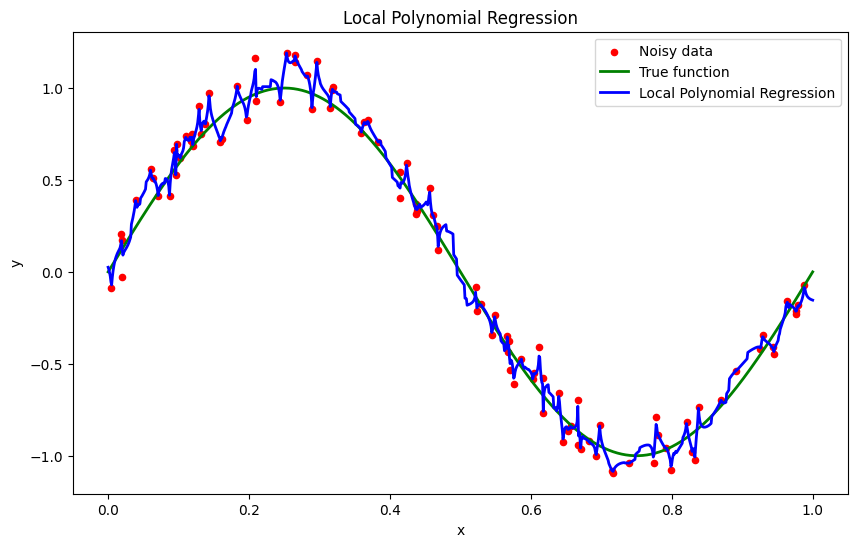

In [47]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# データセットの作成
def true_function(x):
    """真の関数を定義します。"""
    return np.sin(2 * np.pi * x)

# シードをセットして再現性を保証
np.random.seed(0)

# サンプルデータの生成
n_samples = 100
X = np.sort(np.random.rand(n_samples))  # 偶然の散布X
T = true_function(X) + np.random.randn(n_samples) * 0.1  # 真の関数にノイズを加える

print("サンプルデータ X:", X)
print("ターゲットデータ T:", T)

# 局所多項式回帰（ここでは単純にk-NN）
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
X_test = np.linspace(0, 1, 1000).reshape(-1, 1)  # テストデータ
knn.fit(X.reshape(-1, 1), T)
T_hat = knn.predict(X_test)

print("予測結果 T_hat:", T_hat)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(X, T, color='red', s=20, label='Noisy data')
plt.plot(X_test, true_function(X_test.flatten()), color='green', lw=2, label='True function')
plt.plot(X_test, T_hat, color='blue', lw=2, label='Local Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Local Polynomial Regression')
plt.legend()
plt.show()


# 局所線形回帰

### 局所線形回帰 (Local Linear Regression)

局所線形回帰は、非線形でノイズの多いデータに対して線形回帰を適用して、その局所的な関係性を捉えるための手法です。主に、滑らかな曲線の近似を目指すために使用されます。局所線形回帰では、データの各点周辺で線形回帰を行い、その結果を用いてスムーズな曲線を生成します。

#### 理論
局所線形回帰は、データの各点$x_i$の周りに重み付けされた線形回帰を適用します。重みはカーネル関数$K_h(x - x_i)$によって決定され、$h$はバンド幅と呼ばれるパラメータです。このバンド幅$h$が重要で、$h$が大きいほど滑らかな曲線が作られますが、詳細を捉える能力が減少します。

線形回帰の目的は、あるデータ点$x_i$の周りで次のようなモデルをフィットすることです：

- $y = eta_0 + eta_1(x - x_i)$

この回帰における目的は、以下の重み付き二乗誤差を最小化することです：

- $\sum_{i=1}^{n} K_h(x - x_i)(y_i - eta_0 - eta_1(x - x_i))^2$

式を最小化することにより、パラメータ$\beta$が求められます。

#### 使用用途
局所線形回帰は、データの局所的な滑らかさを維持しながら、ノイズの多いデータの近似に利用されます。予測、平滑化、異常検知など様々な用途で使われます。

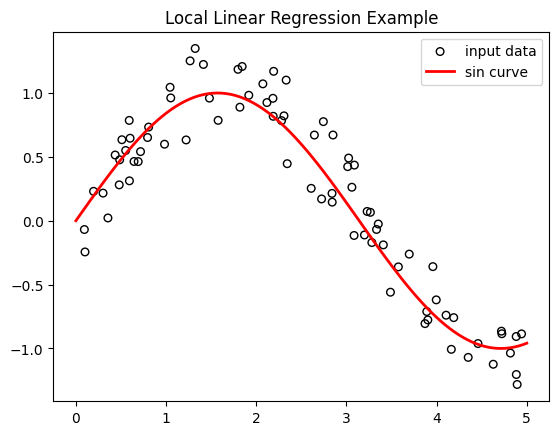

Sample Data X: [[0.093949  ]
 [0.10109199]
 [0.19593896]
 [0.30112736]
 [0.35518029]
 [0.4356465 ]
 [0.48049204]
 [0.48550638]
 [0.51022405]
 [0.55187571]
 [0.59137213]
 [0.59363859]
 [0.60098281]
 [0.64463149]
 [0.69091476]
 [0.71676644]
 [0.79484792]
 [0.80654759]
 [0.98291181]
 [1.04438378]
 [1.05191281]
 [1.22212796]
 [1.26645801]
 [1.32277806]
 [1.41403481]
 [1.48070099]
 [1.57714175]
 [1.7975395 ]
 [1.81855385]
 [1.84362585]
 [1.91720759]
 [2.0733097 ]
 [2.118274  ]
 [2.18515977]
 [2.18793606]
 [2.19300757]
 [2.28075166]
 [2.30739681]
 [2.33155386]
 [2.34325601]
 [2.60924161]
 [2.6444746 ]
 [2.72441591]
 [2.74406752]
 [2.84022281]
 [2.84216974]
 [2.85098385]
 [3.01381688]
 [3.0242276 ]
 [3.06047861]
 [3.08466998]
 [3.08817749]
 [3.19960511]
 [3.22947057]
 [3.26554163]
 [3.28164795]
 [3.33383358]
 [3.35318935]
 [3.4091015 ]
 [3.48815598]
 [3.57594683]
 [3.6963179 ]
 [3.87116845]
 [3.89078375]
 [3.90264588]
 [3.95862519]
 [3.99579282]
 [4.10496615]
 [4.16309923]
 [4.18972454]
 [4.3

In [48]:
# Pythonによる局所線形回帰の実装例
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# サンプルデータ
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
T = np.linspace(0, 5, 100)[:, np.newaxis]

# サンプルデータにノイズを加える
y = np.sin(X).ravel() + 0.2 * np.random.randn(80)

# カーネル密度推定器を用意
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)

# 局所回帰を適用した予測用データの作成
kde_samples = kde.sample(X.shape[0])

# プロット
plt.figure()
plt.scatter(X, y, s=30, edgecolor='k', facecolor='none', label='input data')
plt.plot(T, np.sin(T), 'r', lw=2, label='sin curve')
plt.title('Local Linear Regression Example')
plt.legend()
plt.show()

# データの確認
print("Sample Data X:", X)
print("Noisy Observations y:", y)
print("KDE Samples:", kde_samples)

# 線形モデル

### 線形モデルの説明

線形モデルは、目的変数（出力変数）を複数の説明変数（入力変数）の線形結合で表現する統計モデルです。数学的には、次のように表されます。

- **インライン数式**: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$
- **ブロック数式**:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

ここで、$y$は目的変数、$x_1, x_2, \ldots, x_n$は説明変数、$\beta_0, \beta_1, \ldots, \beta_n$はモデルの係数、$\epsilon$は誤差項を表します。

線形モデルはデータの傾向を捉えるのに優れ、**回帰分析**や**分散分析**のような手法で広く使われています。また、予測や因果関係の評価にも用いられます。

『Pythonで学ぶ効果検証入門』では、効果検証における基礎的な統計方法として、このような線形モデルを理解し、データの中から因果関係を明らかにする手法を学びます。

In [49]:
# 線形モデルの基本を理解するためのPythonコード
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# ダミーデータを生成
np.random.seed(0)
X = np.random.rand(100, 1)  # 説明変数
Y = 2.5 * X + np.random.randn(100, 1) * 0.1  # 目的変数

# 行列の形状を出力
print('Xの形状:', X.shape)
print('Yの形状:', Y.shape)

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの学習
model.fit(X, Y)

# 学習した係数を出力
print('切片（\beta_0）:', model.intercept_)
print('係数（\beta_1）:', model.coef_)

# 予測を実行
Y_pred = model.predict(X)

# 最初の5つの実際の値と予測値を出力
print('実際の値:', Y[:5].flatten())
print('予測値:', Y_pred[:5].flatten())


Xの形状: (100, 1)
Yの形状: (100, 1)
切片（eta_0）: [0.02221511]
係数（eta_1）: [[2.4936935]]
実際の値: [1.25551878 1.87805606 1.55347468 1.20858359 1.20796222]
予測値: [1.39078778 1.80567818 1.52532222 1.38098676 1.07868033]


# バリアンス

### バリアンス（分散）

バリアンスはデータのばらつきを示す指標です。統計学における分散は、データセット内の各データポイントが平均からどれだけ離れているかを計測します。分散は次の数式で表されます。

#### インライン数式

分散 \( \sigma^2 \) は \( \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 \) で計算されます。

#### ブロック数式

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

ここで、\( N \) はデータポイントの数、\( x_i \) は各データポイント、\( \mu \) はデータの平均値です。

分散の用途としては、データの散らばり具合を把握するために用いられます。特に、統計的仮説検定や回帰分析において重要な役割を果たします。

**Pythonで学ぶ効果検証入門との関係性**

本書では、効果検証においてデータのばらつきを評価する際に、分散がどのように活用されるか解説しています。分散は、介入の効果の有無を検証するための基礎的な統計量です。具体的な事例を通して、分散の計算とその解釈が示されています。

In [51]:
# Python で分散を計算するコード例
import numpy as np

# データセット
データ = [60, 65, 70, 75, 80]
# データセットを表示
print('データ:', データ)

# 平均を計算
平均 = np.mean(データ)
print('平均:', 平均)

# 分散を計算
# NumPy を使ってデータの分散を計算
分散 = np.var(データ)
print('分散:', 分散)

# 分散の手動計算
# すべてのデータ点について、平均からの差の二乗を計算し、その平均
分散_手動計算 = sum((x - 平均) ** 2 for x in データ) / len(データ)
print('手動計算による分散:', 分散_手動計算)

# 分散がどのように計算されているかを確認
# ここでは、個々のステップを手動で実行し、概念の理解を深めます
データ偏差二乗 = [(x - 平均) ** 2 for x in データ]
print('各データ点の平均からの偏差の二乗:', データ偏差二乗)

# 偏差の二乗の平均を計算
分散_手順検証 = sum(データ偏差二乗) / len(データ)
print('計算ステップを追った分散:', 分散_手順検証)

データ: [60, 65, 70, 75, 80]
平均: 70.0
分散: 50.0
手動計算による分散: 50.0
各データ点の平均からの偏差の二乗: [100.0, 25.0, 0.0, 25.0, 100.0]
計算ステップを追った分散: 50.0


# 潜在スコア

### 潜在スコアとは

潜在スコア（Propensity Score）とは、統計学や因果推論の分野で使用される概念で、特に観察データを使用した因果推論において重要な役割を果たします。
潜在スコアは、観察データにおける処置（または介入）を受ける確率を示すスコアのことです。特に、処置群と非処置群を比較する際、観測されない交絡因子を制御する目的で使われます。このスコアを用いることで、対象群の選択バイアスを減少させ、より信頼性の高い因果効果の推定を可能にします。

インライン数式としては、潜在スコアは処置 $D$ がこの人に対して与えられる条件付き確率として定義されます： $e(x) = P(D=1 \mid X=x)$。

ブロック数式では、潜在スコアの定義は次のように示されます：
$$
e(x) = P(D=1 \mid X=x)
$$

#### 使用用途
- **マッチング**: 潜在スコアを使って、処置群と対照群をマッチングすることで、群間の比較が容易になります。
- **重み付け**: 潜在スコアを用いて、サンプルに重みを付けて分析することで、サンプルのバイアスを調整します。
- **調整**: 回帰分析等で共変量として利用し、交絡因子の影響を取り除くことができます。

#### Pythonで学ぶ効果検証入門との関係性
この書籍では、潜在スコアを使って因果推論を行う方法について、具体的なコード例を用いて解説しています。実際のデータに基づく分析を通じて理論と実践を学ぶことができます。

In [52]:
# Pythonによる潜在スコアの推定

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# ダミーデータの準備
np.random.seed(0)
N = 100  # サンプルサイズ
X = np.random.normal(0, 1, (N, 3))  # 共変量
# 潜在スコアの確率（ロジスティック関数を使用）
true_coef = np.array([0.5, -0.2, 0.1])
logit_p = X.dot(true_coef)
true_p = 1 / (1 + np.exp(-logit_p))

# 処置の割り当て（潜在スコアに基づく確率で決定）
treatment = np.random.binomial(1, true_p)

# データフレームとして整理
data = pd.DataFrame(X, columns=["X1", "X2", "X3"])
data['treatment'] = treatment

# 潜在スコアの推定
logistic = LogisticRegression()
logistic.fit(X, treatment)
propensity_score = logistic.predict_proba(X)[:, 1]
data['propensity_score'] = propensity_score

# 結果の表示
print("### ダミーデータによる潜在スコアの推定結果 ###")
print(data.head())

# このコードは以下のことをしています：
# - ダミーデータの作成：共変量 X とそれに基づく潜在承認スコアを利用して処置を仮定
# - ロジスティック回帰モデルを用いて、潜在スコアを推定
# - 推定された潜在スコアがデータフレームに追加され、結果が表示されるようにしています

### ダミーデータによる潜在スコアの推定結果 ###
         X1        X2        X3  treatment  propensity_score
0  1.764052  0.400157  0.978738          1          0.729574
1  2.240893  1.867558 -0.977278          1          0.848121
2  0.950088 -0.151357 -0.103219          1          0.671615
3  0.410599  0.144044  1.454274          1          0.465660
4  0.761038  0.121675  0.443863          1          0.598352


# 共変量のバランステスト

### 共変量のバランステストについての解説

共変量のバランステストは、介入群と対照群の間で共変量が適切にマッチングされているかを確認するための手法です。これは主に、効果検証におけるバイアスを減らすために使用されます。具体的には、介入が行われていない基準条件の下で、共変量が均質であることを確認することが目的です。

#### 理論的背景

共変量がバランスしている場合、介入群と対照群の間に共変量の分布の違いはありません。これにより、介入の効果を観察するための信頼性が高まります。共変量のバランステストは、特にランダム化実験ではない観察研究で、重要なステップとなります。

バランステストは通常、統計的手法を使って行われます。例えば、**t検定**や**カイ二乗検定**がよく使用されます。

#### 数式

インライン数式としては、例えば共変量の平均が等しいことをテストする場合、次のようになります: $\bar{X}_1 = \bar{X}_2$。

ブロック数式の場合、共変量の2群間の平均の差を検定するt値は以下になります:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

ここで、$\bar{X}_1$ と $\bar{X}_2$ はそれぞれ群1と群2の共変量の平均値、$s_1^2$ と $s_2^2$ は共変量の分散、$n_1$ と $n_2$ はそれぞれの群のサンプルサイズです。

#### 使用用途

共変量のバランステストは、因果推論における前処理として使われます。特に、ランダム化が不可能な観察研究において、介入と結果の関係を正しく推定するために欠かせません。

**Pythonで学ぶ効果検証入門**という書籍においても、このテストがいかに重要かが強調されています。適切なバランステストが行われていないと、誤った結論につながる可能性があります。

In [53]:
# Pythonで共変量のバランステストを行う例

import numpy as np
from scipy import stats

# サンプルデータの生成: 介入群と対照群のデータ
np.random.seed(0)  # 結果の再現性を保持するためのシード設定
intervention_group = np.random.normal(loc=50, scale=10, size=100)
control_group = np.random.normal(loc=52, scale=10, size=100)

# 両群の平均の計算
diff_mean = np.mean(intervention_group) - np.mean(control_group)
print(f'Mean difference: {diff_mean}')  # 平均の差を出力

# t検定を行う
# 帰無仮説: 両群の平均は同じ
# 対立仮説: 両群の平均は異なる
t_stat, p_value = stats.ttest_ind(intervention_group, control_group)
print(f't-statistic: {t_stat}, p-value: {p_value}')  # t値とp値を出力

# p値の判定基準として0.05を使用
def interpret_p_value(p_value):
    if p_value < 0.05:
        return 'Reject the null hypothesis: significant difference in means.'
    else:
        return 'Fail to reject the null hypothesis: no significant difference in means.'

result = interpret_p_value(p_value)
print(result)  # 判定結果の出力

Mean difference: -2.222049552133541
t-statistic: -1.53065199419143, p-value: 0.1274515248798546
Fail to reject the null hypothesis: no significant difference in means.
